In [1]:
print("3.Classification.ipynb")
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

print(sklearn.__version__)

3.Classification.ipynb
1.0.2


# 1. 분류 평가(Classfication Evaluation)

--------------
## 1-1. 분류 평가 지표
   - 혼동행렬(confusion matrix)
    - 모델의 성능을 평가할 때 사용되는 지표
    - 예측값이 실제 관측값을 얼마나 정확히 예측했는지 보여주는 행렬   
    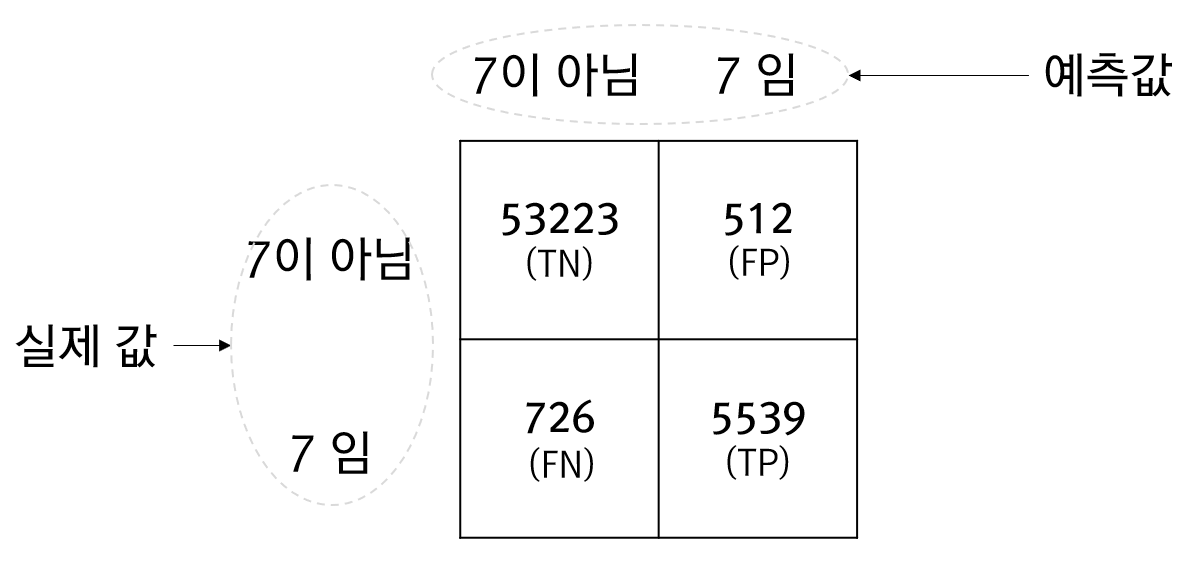
   - 혼동행렬을 이용한 평가지표
     - TP, TN, FP, FN, 정확도(Accuracy), 오분류율(Error Rate), 민감도(Sensitivity, (== Recall(재현율))), 특이도(Specificity), FR rate, 정밀도(Precision), F1 score, Fβ score, 카파 통꼐량
   - ROC curve
     - ROC curve: 수신자 판단 곡선, 위양성률(FPR, fall-out)과 재현율(recall, TPR)의 변화 시각화
     - AUC(Area Under the curve): ROC 곡선 아래 영역
  - Cohen's Kappa 통계량 

In [ ]:
# 분류 평가를 위한 분류 데이터셋 + 모델 학습/예측

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

digits = load_digits()

y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)

LR = LogisticRegression(max_iter = 500)

LR.fit(X_train, y_train)
pred = LR.predict(X_test)


In [ ]:
# confusion matrix , 혼동행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred) # 예측에 대한 혼동행렬 출력
#####
# [TN(True Negative(실제: 거짓, 예측: 거짓)),FP(False Positive(실제: 거짓, 예측: 참))]
# [FN(False Negative(실제: 참, 예측: 거짓)),TP(True Positive(실제: 참, 예측: 참))]
#####

array([[400,   5],
       [  2,  43]])

In [ ]:
# accuracy(정확도), Error rate(오분류율)
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, pred)) # 정확도: (TP + TN) /  (TP + FN + FP + TN)
print("Error Rate:",1-accuracy_score(y_test, pred)) # 오분류율: (FP + FN) / (TP + FN + FP + TN)

## 라벨링이 불균형한 데이터셋의 경우에는 정확도만으로는 분류모델의 유의미한 성능 지표를 얻을 수 없다
## (ex. 99%가 참이고, 1%가 거짓인 데이터셋, 그냥 참이라고 예측하면 정확도 99%)

Accuracy: 0.9844444444444445
Error Rate: 0.015555555555555545


In [ ]:

# Recall(재현율 == Sensitivity(민감도)), Precision(정밀도)
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print("Recall == Sensitivity:", recall_score(y_test,pred)) 
# 재현율, 민감도: 실제로 Positive인 범주 중에서 Positive로 올바르게 예측한 비율, TP / (TP + FN)
print("Precision:", precision_score(y_test, pred))
# 정밀도: Positive로 예측한 범줌 중에서 실제 Positive인 비율, TP / (TP + FP)

### 재현율 (recall)
## 재현율이 중요 지표인 경우, 실제 Positive 데이터를 Negative로 잘못 판단하면 안되는 경우
## ex. 암 판단 모델

### 정밀도 (Precision)
## 정밀도가 중요 지표인 경우, 실제 Negative 데이터를 Positive로 잘못 판단하면 안되는 경우
## ex. 스팸메일 분류 모델

Recall == Sensitivity: 0.9555555555555556
Precision: 0.8958333333333334


In [ ]:
### 재현율 / 정밀도 트레이드오프
## 분류의 결정 임곗값(Threshold)을 조정하여 정밀도 또는 재현율의 수치를 높일 수 있지만
## 서로가 상호 보완적인 지표이기 때문에 한쪽을 높이면 한쪽은 떨어진다.

print('실제 class 값', y_test[75:80])
print()

pred_proba = LR.predict_proba(X_test)
pred = LR.predict(X_test)

print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba[75:80])
print('threshold가 0.5일 때, 예측한 class 값:', pred[75:80])
print('혼동행렬')
print(confusion_matrix(y_test, pred))
print()

from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold = 0.99) # positive일 확률이 99% 이상이어야만 positive로 인정해주겠다
threshold_pred = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))
print("threshold가 0.99일때, 예측한 class 값: ", threshold_pred[75:80].reshape(1,-1)) 
print("Recall == Sensitivity:", recall_score(y_test,threshold_pred)) # threshold 값이 커졌으므로, recall이 낮아진다
print("Precision:", precision_score(y_test, threshold_pred)) # threshold 값이 커졌으므로, precision이 높아진다
print(confusion_matrix(y_test, threshold_pred))
print()

실제 class 값 [0 0 1 1 0]

두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[9.99999997e-01 3.18517118e-09]
 [9.99999998e-01 1.93610001e-09]
 [1.90528323e-05 9.99980947e-01]
 [2.76216292e-02 9.72378371e-01]
 [9.99995802e-01 4.19814337e-06]]
threshold가 0.5일 때, 예측한 class 값: [0 0 1 1 0]
혼동행렬
[[400   5]
 [  2  43]]

threshold가 0.99일때, 예측한 class 값:  [[0. 0. 1. 0. 0.]]
Recall == Sensitivity: 0.8888888888888888
Precision: 1.0
[[405   0]
 [  5  40]]



In [ ]:
# precision_recall_curve, 임계값에 따른 precision recall score
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba[:,1].reshape(-1,1))
# 임계값에 따른 precision recall score 추출

print('반환된 분류 결정 임곗값 배열의 shape: ', thresholds.shape)

thr_index = np.arange(0, thresholds.shape[0],7)
df  = pd.DataFrame([np.round(thresholds[thr_index],2),np.round(precisions[thr_index],3),np.round(recalls[thr_index],3)], index = ['thresholds', 'precisions','recalls'])
df

반환된 분류 결정 임곗값 배열의 shape:  (76,)


,0,1,2,3,4,5,6,7,8,9,10
thresholds,0.000,0.000,0.000,0.020,0.600,0.980,1.000,1.0,1.000,1.000,1.000
precisions,0.592,0.638,0.710,0.782,0.896,1.000,1.000,1.0,1.000,1.000,1.000
recalls,1.000,0.978,0.978,0.956,0.956,0.911,0.756,0.6,0.444,0.289,0.133


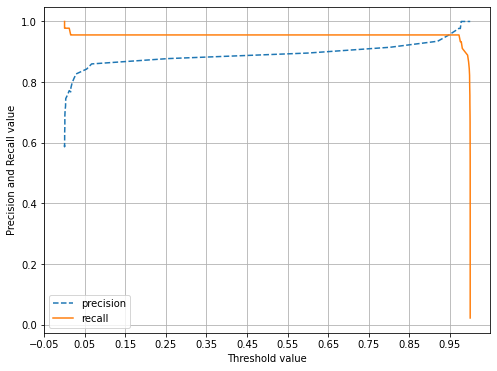

In [ ]:
# precision_recall_curve 그리기

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)

  plt.figure(figsize = (8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
  

  start,end = plt.xlim() # x축의 한계값 
  plt.xticks(np.round(np.arange(start,end,0.1),2)) # 눈금표시

  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, pred_proba[:,1].reshape(-1,1))

In [ ]:
### 정밀도와 재현율의 맹점
## 정밀도 = 예측이 postive인 범주 안에서 실제 positive의 비율 TP/(TP + FP)
## 재현율 = 실제 positive인 범주 안에서 예측이 positive인 비율 TP/(TP + FN)

## if threshold가 1에 가까운 수:
##   예측을 보수적으로 하게되어, 예측이 틀릴 확률이 현저히 줄어든다. -> precision_score = 1
## if threshold가 0에 가까운 수:
##   모든 사례를 positive로 예측하면, 실제 positive인 값들은 모두 positive로 예측된다 -> recall_score = 1
## 정밀도와 재현율이 적절히 조화되어서 종합적인 성능평가에 기여하여야한다. => F1 score

In [ ]:
# F1 score, F1 = 2 * (precision * recall) / (precision + recall), precision과 recall의 조화평균
from sklearn.metrics import f1_score

print('f1 score: ', f1_score(y_test,pred))


f1 score:  0.924731182795699


In [ ]:
# F-beta score, F-beta = (1+beta^2) * (precision * recall) / (beta^2 * precision + recall), recall에 beta만큼의 가중치를 준 F1 score
from sklearn.metrics import fbeta_score
print("Recall == Sensitivity:", recall_score(y_test,pred)) 
print("Precision:", precision_score(y_test, pred))
print('f1 score: ', f1_score(y_test,pred))
print('f2 score: ', fbeta_score(y_test,pred,beta = 2)) # recall에 2배 가중치, recall 값에 더 가까워진다
print('f0.5 score: ', fbeta_score(y_test,pred,beta = 0.5))# recall에 0.5배 가중치, precision 값에 더 가까워진다

Recall == Sensitivity: 0.9555555555555556
Precision: 0.8958333333333334
f1 score:  0.924731182795699
f2 score:  0.9429824561403511
f0.5 score:  0.9071729957805909


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

## classification_report & macro avg, weighted avg
#  https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       405
           1       0.90      0.96      0.92        45

    accuracy                           0.98       450
   macro avg       0.95      0.97      0.96       450
weighted avg       0.99      0.98      0.98       450



In [ ]:
# FP rate, 실제로 Negative인 범주 중에서 Positive로 잘못 예측한 비율,FPR(거짓 긍정률) ,FP / (FP + TN)
# TP rate, 실제로 Positive인 범주 중에서 Positive로 예측한 비율, TPR(참 긍정률), TP / (FN + TP) == recall, sensitivity
# ROC curve(Receiver Operation Characteristic Curve, 수신자 판단 곡선), FPR을 x축으로, TPR을 y축으로한다
# AUC 값이 0.5이면 분류 능력이 없음, 1에 가까워질수록 분류 능력 좋음

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:,1].reshape(-1,1)) # thresholds를 조정하면서 roc_curve 생성

pd.DataFrame([thresholds.round(4),fpr.round(4),tpr.round(4)], index = ['thresholds','fpr','tpr'])

,0,1,2,3,4,5,6,7,8,9
thresholds,2.0,1.0000,0.9779,0.9757,0.9724,0.0156,0.0120,0.0005,0.0005,0.0
fpr,0.0,0.0000,0.0000,0.0025,0.0025,0.0321,0.0321,0.0765,0.0765,1.0
tpr,0.0,0.0222,0.9333,0.9333,0.9556,0.9556,0.9778,0.9778,1.0000,1.0


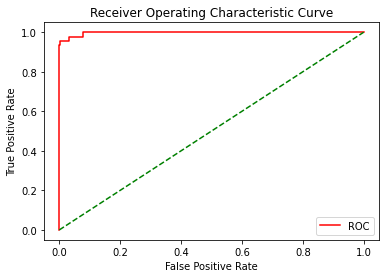

In [ ]:
# roc curve 그리기
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--') # 기준이 되는 랜덤 분류기 auc = 0.5
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

In [ ]:
# roc_auc_score
from sklearn.metrics import roc_auc_score

print('AUC: ', roc_auc_score(y_test,pred)) # roc 곡선 아래 영역의 넓이 계산

AUC:  0.9716049382716049


In [ ]:
# 특이도 specificity = 1- FP rate()

In [ ]:
# Cohen's kappa 통계량
# (P_A - P_C) / (1 - P_c), P_A: 2명의 평가자간 일치 확률, P_C 우연히 두 평가자에 의하여 일치된 평가를 받을 비율
# P_c = 1번 평가자가 True로 평가할 확률 * 2번 평가자가 True로 평가할 확률 + 1번 평가자가 False로 평가할 확률 * 2번 평가자가 False로 평가할 확률

from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, pred)

# >0 거의 없는 일치도
# 0.0~0.2 약간의 일치도
# 0.2~0.4 어느정도 일치도
# 0.4~0.6 적당한 일치도
# 0.6~0.8 상당한 일치도
# 0.8~1.0 완벽한 일치도

0.9160671462829736

------------------
##1-2. 사이킷런 예제( 파마 인디언 당뇨병으로 예측하기,분류 평가 지표 사용)

In [ ]:
# kaggle 파마 인디언 당뇨병 데이터 받아오기
!kaggle datasets download -d uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 1.60MB/s]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts()) # negative 값이 상대적을 많음
diabetes_data.head()
# Pregnancies: 임신횟수, Glucose: 포도당 부하 검사 수치
# BloodPressure: 혈압, SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값
# Insulin: 혈청 인슐린, BMI: 체질량지수
# DiabetesPedigreeFunction: 당뇨 내력 가중치 값, Age: 나이, Outcom: 클래스 결정 값(0 or 1)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_data.info()
# 768개의 데이터, 누락값없음, 전부 숫자형 -> 결측치 처리, categorical feature encoding 불필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# feature dataset X, label dataset y 추출
X = diabetes_data.iloc[:,:-1] # feature dataset
y = diabetes_data.iloc[:,-1] # label dataset

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 156, stratify = y) # 클래스별로 층화추출

# 로지스틱 회귀로 학습 얘측 및 평가 수행
lr_clf = LogisticRegression(max_iter = 500)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
print("오차행렬:\n",confusion_matrix(y_test, pred))
print("정확도 accuracy:{0:.4f}".format(accuracy_score(y_test,pred)))
print("정밀도 precision:{0:.4f}".format(precision_score(y_test,pred)))
print("재현율 recall:{0:.4f}".format(recall_score(y_test,pred)))
print("F1 score:{0:.4f}".format(f1_score(y_test,pred)))
print("AUC score:{0:.4f}".format(roc_auc_score(y_test,pred)))

오차행렬:
 [[90 10]
 [21 33]]
정확도 accuracy:0.7987
정밀도 precision:0.7674
재현율 recall:0.6111
F1 score:0.6804
AUC score:0.7556


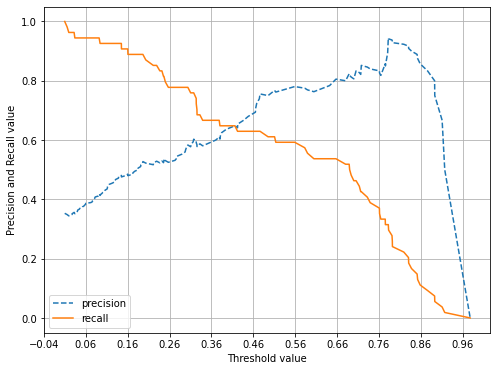

In [ ]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

plt.figure(figsize = (8,6))
threshold_boundary = thresholds.shape[0]
plt.plot(thresholds, precisions[:threshold_boundary], linestyle = '--', label = 'precision')
plt.plot(thresholds, recalls[:threshold_boundary], label = 'recall')

start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1),2))

plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
plt.legend(); plt.grid()
plt.show()

# precision_recall_curve를 보면 threshold가 0.42 정도에서 precision과 recall이 균형을 이루지만 그 값이 0.7이하로 매우 낮다

In [ ]:
diabetes_data.describe() #DF의 기본 통계량
# 값이 0인 항목이 굉장히 많다

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

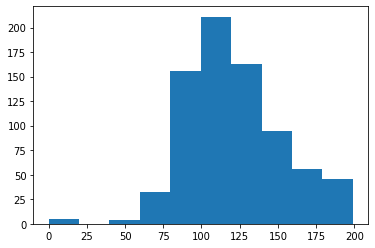

In [ ]:
plt.hist(diabetes_data['Glucose'], bins = 10)

In [ ]:
# 0값을 검사할 feature 명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] # Pregnancies는 출산횟수이므로 0이 나올 수 있음

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# feature 별로 반복하면서 데이터 값이 0인 데이터 건수를 출력하고, 퍼센트 계산
for feature in zero_features:
  zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
  print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

# Insulin과 SkunThickness feature는 각각 0의 값이 전체의 29%, 48%로 상당히 많다.
# 전체 데이터 개수가 768개로 많지 않기 때문에 0값 각각을 중앙값으로 대체한다

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [ ]:
# zero_features 리스트 내부에 저장된 개별 feature들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0,mean_zero_features) 
# replace에서 list 값을 제공하면 순서에 맞춰 값을 채워넣는다

In [ ]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify = y)

# StandardScaler 클래스를 이용해 feature dataset에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 로지스틱회귀를 학습/평가
lr_clf = LogisticRegression(max_iter = 500)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
print("오차행렬:\n",confusion_matrix(y_test, pred))
print("정확도 accuracy:{0:.4f}".format(accuracy_score(y_test,pred)))
print("정밀도 precision:{0:.4f}".format(precision_score(y_test,pred)))
print("재현율 recall:{0:.4f}".format(recall_score(y_test,pred)))
print("F1 score:{0:.4f}".format(f1_score(y_test,pred)))
print("AUC score:{0:.4f}".format(roc_auc_score(y_test,pred)))

오차행렬:
 [[90 10]
 [21 33]]
정확도 accuracy:0.7987
정밀도 precision:0.7674
재현율 recall:0.6111
F1 score:0.6804
AUC score:0.7556


In [ ]:
from sklearn.preprocessing import Binarizer

# thresholds값의 변화에 따라 평가값의 변화 살펴보기
thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.50]
pred_proba = lr_clf.predict_proba(X_test)
pred_proba_c1 = pred_proba[:,1]
eval = []
for custom_threshold in thresholds:
  binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1.reshape(-1,1))
  custom_predict = binarizer.transform(pred_proba_c1.reshape(-1,1))
  eval.append([accuracy_score(y_test,custom_predict),precision_score(y_test,custom_predict),
               recall_score(y_test,custom_predict),f1_score(y_test,custom_predict),roc_auc_score(y_test,custom_predict)])

df = pd.DataFrame(eval, index = thresholds , columns = ['accuracy','precision','recall','f1_score','roc_auc_score'])
df

# threshold = 0.48이 가장 적절해보인다

,accuracy,precision,recall,f1_score,roc_auc_score
0.30,0.714286,0.565789,0.796296,0.661538,0.733148
0.33,0.740260,0.600000,0.777778,0.677419,0.748889
0.36,0.746753,0.619048,0.722222,0.666667,0.741111
0.39,0.753247,0.633333,0.703704,0.666667,0.741852
0.42,0.779221,0.692308,0.666667,0.679245,0.753333
0.45,0.785714,0.705882,0.666667,0.685714,0.758333
0.48,0.798701,0.744681,0.648148,0.693069,0.764074
0.50,0.798701,0.767442,0.611111,0.680412,0.755556


In [ ]:
# threshold를 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold = 0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))


print("오차행렬:\n",confusion_matrix(y_test, pred_th_048))
print("정확도 accuracy:{0:.4f}".format(accuracy_score(y_test,pred_th_048)))
print("정밀도 precision:{0:.4f}".format(precision_score(y_test,pred_th_048)))
print("재현율 recall:{0:.4f}".format(recall_score(y_test,pred_th_048)))
print("F1 score:{0:.4f}".format(f1_score(y_test,pred_th_048)))
print("AUC score:{0:.4f}".format(roc_auc_score(y_test,pred_th_048)))

## binarizer.fit_transform()는 2D array만 받으므로 reshape를 통해 2D array로 바꿔주어야한다.
## y_test.shape  = (154,)이므로, pred_proba[:,1]도 .reshape(-1,1)를 하여 열벡터를 맞춰주어야 평가메서드를 사용할 수 있다

'\nprint("오차행렬:\n",confusion_matrix(y_test, pred_th_048))\nprint("정확도 accuracy:{0:.4f}".format(accuracy_score(y_test,pred_th_048)))\nprint("정밀도 precision:{0:.4f}".format(precision_score(y_test,pred_th_048)))\nprint("재현율 recall:{0:.4f}".format(recall_score(y_test,pred_th_048)))\nprint("F1 score:{0:.4f}".format(f1_score(y_test,pred_th_048)))\nprint("AUC score:{0:.4f}".format(roc_auc_score(y_test,pred_th_048)))\n'

## 1-3. 사이킷런 예제(mnist, 이진분류, 다중분류 평가)

In [ ]:
# mnist 데이터 내려받기
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys() 

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
mnist.get('DESCR') # mnist 설명

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [ ]:
X, y = mnist['data'], mnist['target']
print('X.shape: ',X.shape) # 데이터의 크기
print('X type: ', type(X)) # 데이터의 타입
print('X info: ', X.info()) # 데이터의 정보
print()
print('y.shape: ',y.shape) # 레이블의 크기 
print('y type: ', type(y)) # 데이터의 타입
print('y info: ', y.describe()) # 레이블의 정보

# 784개의 특성(28*28 image), 70000개의 샘플, 이미지 샘플이므로 각각의 픽셀은 0~255의 값을 가진다.

X.shape:  (70000, 784)
X type:  <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB
X info:  None

y.shape:  (70000,)
y type:  <class 'pandas.core.series.Series'>
y info:  count     70000
unique       10
top           1
freq       7877
Name: class, dtype: object


In [ ]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y # 레이블의 데이터 타입 == object, 숫자로 바꿔주어야함

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

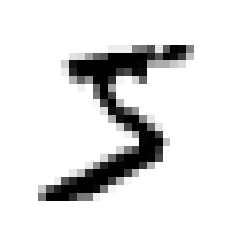

0번째 샘플의 레이블값:  5


In [ ]:
# 샘플 하나의 이미지 출력

import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[0,:].values # 첫번째 샘플
some_digit_image = some_digit.reshape(28,28) # 28*28 이미지로 reshape, reshape는 ndarray의 메서드

plt.imshow(some_digit_image, cmap = 'binary')
plt.axis("off")
plt.show()
print('0번째 샘플의 레이블값: ',y[0])

In [ ]:
# 레이블의 데이터 타입을 숫자로 바꾸기
y = y.astype(np.uint8)

In [ ]:
# 훈련 / 평가 데이터 나누기
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
# 이진 분류기 훈련, 5인지 아닌지 판단

y_train_5 = (y_train == 5) # label이 5면 True, 5가 아니면 False인 bool series
y_test_5 = (y_test == 5)

In [ ]:
# 확률적 경사 하강법으로 이진분류기 훈련
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
# accuracy score로 SGDClassifier 평가하기
from sklearn.metrics import accuracy_score
pred = sgd_clf.predict(X_test)

print("accuaracy: ", accuracy_score(y_test_5,pred))

accuaracy:  0.9492


In [ ]:
# stratifiedKFold로 교차 검증하기
# 이진분류에서 

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42, shuffle = True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf  = clone(sgd_clf)
  X_train_folds = X_train.iloc[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train.iloc[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  print("accuaracy: ", accuracy_score(y_test_fold,y_pred))

accuaracy:  0.9669
accuaracy:  0.91625
accuaracy:  0.96785


In [ ]:
# cross_val_score를 사용해서 교차검증
from sklearn.model_selection import cross_val_score
score = cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring='accuracy')
score

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
# 모든 이미지를 5가 아님 == false로 예측하는 더미 분류기로 예측
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y = None):
    return self
  def predict(self, X):
    return np.zeros((len(X),1), dtype = bool)

never_5_clf = Never5Classifier()
score = cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")
score

## 불균형한 데이터셋이기 때문에 그냥 모든걸 false로 예측하는 모델도 90% 이상의 정확도를 가진다.

array([0.91125, 0.90855, 0.90915])

In [ ]:
# cv 예측기
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train, y_train_5, cv = 3)
#오차 행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
# 정밀도 재현율 f1 score
from sklearn.metrics import precision_score, recall_score, f1_score
print("precision_score: ",precision_score(y_train_5, y_train_pred))
print("recall_score: ",recall_score(y_train_5, y_train_pred))
print("f1_score", f1_score(y_train_5, y_train_pred))

precision_score:  0.8370879772350012
recall_score:  0.6511713705958311
f1_score 0.7325171197343846


In [ ]:
# threshold를 내리면 recall 값이 높아지고, precision이 낮아진다
# threshold를 높이면 recall 값이 낮아지고, precision이 높아진다
# method = decision_function
# sgdClassifier에는 predict_proba가 없다

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")


from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
## precision_recall_curve return:
# precision: ndarray of shape (n_thresholds + 1,), recall: ndarray of shape (n_thresholds + 1,), threshold: sndarray of shape (n_thresholds,)
# precision[0] = 0, precision[-1] = 1, recal[0] = 1, recall[-1] = 0

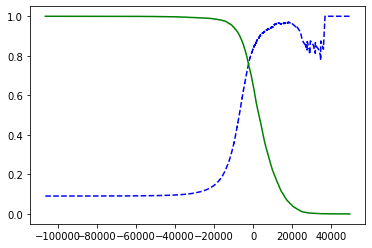

In [ ]:
# threshold에 따른 recall, precision 값
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label ="정밀도")
  plt.plot(thresholds, recalls[1:], "g-", label = "재현율")
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# recall은 threshold가 올라감에 따라 무조건 줄어들 수 밖에 없지만,
# precision은 thresholds가 올라가도 가끔 낮아질 때가 있다.

In [ ]:
# ap score, precision_recall 그래프에서 그래프 선 아래쪽의 면적을 계산하는 방법
from sklearn.metrics import average_precision_score

print(average_precision_score(y_train_5,y_scores))

0.810041762752646


In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # threshold 값: 3370.019499143958
y_train_pred_90 = (y_scores >= threshold_90_precision)
print("precision_score: ", precision_score(y_train_5, y_train_pred_90))
print("recall_score: ", recall_score(y_train_5, y_train_pred_90))

# precision이 90을 찍음

precision_score:  0.9000345901072293
recall_score:  0.4799852425751706


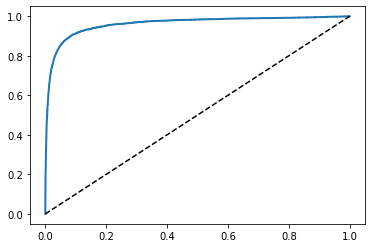

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds  = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label = None):
  plt.plot(fpr, tpr, linewidth = 2, label = label)
  plt.plot([0,1],[0,1], 'k--')

plot_roc_curve(fpr, tpr)
plt.show()

# roc_curve x 축: fpr (실제 class 0중에 못 맞춘 비율)
# roc_curve y 축: tpr (실제 class 1중에 맞춘 비율)

In [ ]:
# auc 값, roc_curve 곡선 아래 면적
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

ROC curve vs PR(정밀도/재현율) 곡선:   
양성 클래스가 드물거나 거짓 음성(negative로 예측했는데 실제로는 positive인 것)보다 거짓 양성(positive로 예측했는데 실제로는 negative인 것)이 더 중요할때 PR 곡선을 사용한다

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_

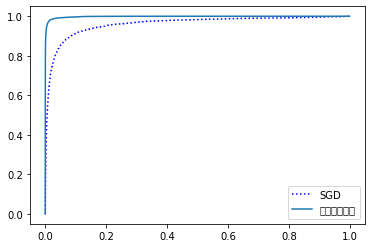

In [ ]:
# RandomForestClassifier로 예측 / 평가
from sklearn.ensemble import RandomForestClassifier
# RandomForestClassifier에는 decisionfunction이 없고, predict_proba가 있다.

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = "predict_proba")

# roc curve
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_probas_forest[:,1]) # 양성일 확률[:,1] 사용

plt.plot(fpr, tpr, "b:", label = "SGD") # sgd roc_curve
plt.plot(fpr_forest, tpr_forest, label = "랜덤포레스트") # random forest roc_curve
plt.legend(loc = "lower right")
plt.show()

In [ ]:
# random forest auc
roc_auc_score(y_train_5, y_probas_forest[:,1])

0.9983436731328145

다중 분류기(multi-class classifier): 둘 이상의 클래스를 구별하는 분류기   
이진 분류기(binary classifier): 두개의 클래스를 구별하는 분류기   

이진 분류기로 다중 분류기 만들기
 - OvR(One-versus-the-rest): 이미지를 분류 할 때 각 분류기의 결정점수중에서 가장 높은 것을 클래스로 선택    
 (ex. 0 or not 이진 분류기 vs ... vs 9 or not 이진 분류기 )
 - OvO(One-versus_One): 각 숫자의 조합마다 이진 분류기를 훈련, 가장 많이 양성으로 분류된 클래스 선택   
 (ex. 1 or 2, 1 or 3, ... ,8 vs 9)


In [ ]:
# svc(support vector classifier)로 다중 예측 / 평가
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
print("예측: ",svm_clf.predict(X_test.iloc[0,:].values.reshape(1,-1)), "실제 값: ", y_test.iloc[0])
print("decision_function: \n", svm_clf.decision_function(X_test.iloc[0,:].values.reshape(1,-1)))
# SVC는 decision_function의 개수가 10개이므로 OvO를 사용하여서 학습하였음

예측:  [7] 실제 값:  7
decision_function: 
 [[ 3.80895496 -0.30212376  6.19343167  8.29375992  1.71167996  4.76436748
   0.69153837  9.31783975  2.75699419  7.28292338]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# OneVsRestClassifier
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
print("예측: ",ovr_clf.predict(X_test.iloc[0,:].values.reshape(1,-1)), "실제 값: ", y_test.iloc[0])

예측:  [7] 실제 값:  7


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packa

In [ ]:
# SGDClassifier로 다중 분류하기
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = "accuracy")


array([0.87365, 0.85835, 0.8689 ])

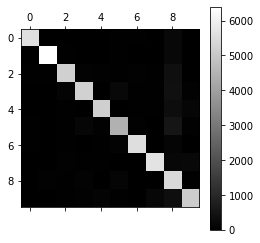

In [ ]:
# 입력 스케일 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# 스케일 조정한 데이터 값으로 다중 분류, SGDClassifier
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred) # 혼동행렬
plt.matshow(conf_mx, cmap = plt.cm.gray) # 혼동행렬 시각화
plt.colorbar()
plt.show()


다중분류에서의 혼동행렬: https://ai-creator.tistory.com/579   
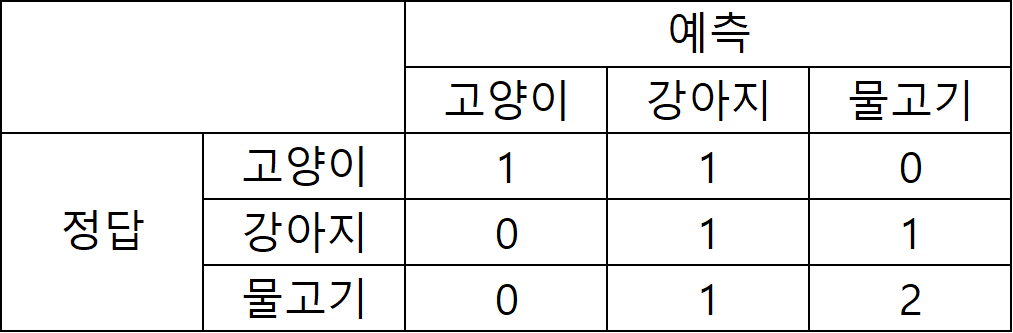

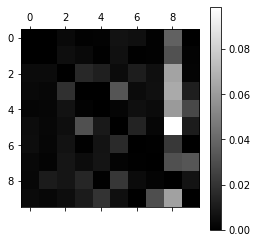

In [ ]:
# 혼동행렬 오류값에 집중해서 보기
row_sums = conf_mx.sum(axis = 1, keepdims=True) # 각 레이블에 해당하는 개수 구하기
norm_conf_mx = conf_mx / row_sums # 전체 값을 나눠서 오류 비율 구하기
np.fill_diagonal(norm_conf_mx,0) # 대각값(잘 분류된 값) 0으로 바꾸기, 오류값 더 잘 보이도록
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.colorbar()
plt.show()

# 8로 잘못 예측되는 값들이 많이 생긴다

In [ ]:
# 다중 레이블 분류
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd] # 배열 세로로 붙이기

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel) # 다중 레이블 분류
#평가
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_multilabel, cv = 3)
f1_score(y_multilabel, y_train_knn_pred, average = "macro") # macro: 가중치가 적용되지 않은 평균

0.976410265560605

In [ ]:
# 다중 출력 다중 레이블 분류

# 노이즈 낀 이미지 생성
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

# knn 훈련
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

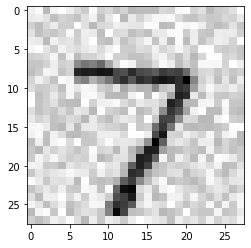

In [ ]:
# 노이즈 낀 이미지
plt.imshow(X_test_mod.iloc[0].values.reshape(28,28), cmap = 'binary')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


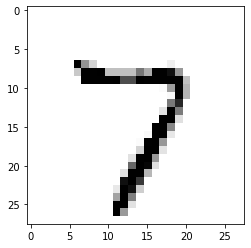

In [ ]:
# knn 출력 / 노이즈 제거 이미지
clean_digit = knn_clf.predict([X_test_mod.iloc[0].values])
plt.imshow(clean_digit.reshape(28,28), cmap = 'binary')
plt.show()

# 분류(classification) - 로지스틱 회귀

## 2-1. 퍼셉트론, 아달린, 선형회귀 (python 구현)

뉴런의 작동방식:   
초기 머신러닝에서는 뉴런을 모방하여 머신러닝을 구현하려고 노력했다. 뉴런은 수상 돌기에 여러 신호가 도착하면 세포체에 합쳐지고 합처진 신호가 특정 임계값을 넘으면 출력신호가 생성되고 축삭 돌기를 이용하여 전달된다.

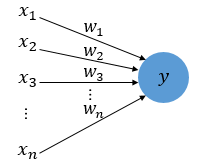   
단층 퍼셉트론(Single-layer Perceptron):    
$x$는 입력 값을 나타내며, $w$는 가중치, $y$는 출력값이다. 각각의 입력값에는 각각의 가중치가 존재하는데, 이때 가중치의 값이 크면 클수록 해당 입력값이 중요하다는 것을 의미한다. 각 입력값이 가중치에 곱해져서(선형 함수) 인공 뉴련에 보내지고 그 값이 임계치를 넘으면 인공 뉴런은 1을 출력하고 그렇지 않으면 0을 출력한다.

$$if\; \sum_{i}^{n}x_iw_i\;\geq \; \theta (threshold) \to y = 1 \\
if\; \sum_{i}^{n}x_iw_i\;<  \; \theta (threshold) \to y = 0  $$

주로 threshhold는 좌변으로 넘겨져 bias로 표현된다
$$if\; \sum_{i}^{n}x_iw_i + b\;\geq \; 0) \to y = 1 \\
if\; \sum_{i}^{n}x_iw_i + b\;<  \; 0 \to y = 0  $$



단층 퍼셉트론의 한계:   
single-layer perceptron은 AND, OR, NAND 등 여러 논리 회로를 표현할 수 있지만, XOR gate의 논리구조는 표현할 수 없다.(하나의 직선으로는 XOR을 표현할 수 없다.) -> 인공지능의 겨울   
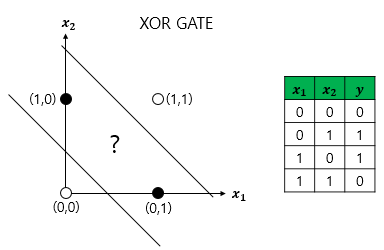

In [ ]:
# perceptron과 AND gate
# AND gate
# x1 x2 y
# 0 0 0
# 0 1 0
# 1 0 0
# 1 1 1

def AND_gate(x1, x2):
  w1 = 0.5
  w2 = 0.5
  b = -0.7
  result = x1*w1 + x2*w2 +b
  if result <= 0:
    return 0
  else:
    return 1

print(AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1))

0 0 0 1


퍼셉트론의 학습 방법:   
가중치와 입력값을 곱해서 더한 결과값이 목표값과 오차가 얼마나 되는 지 계산한 후 이 오차를 줄이기 위해 모든 가중치값을 학습률 $\eta $에 비례하여 동시에 변화시킨다
$$\\
w_j:=w_j+\Delta w_j\\
\Delta w_j = \eta(y^{(i)}-\hat{y}^{(i)})x^{(i)}_j$$


In [ ]:
# 퍼셉트론 알고리즘 구현
class perceptron(object):
  # 퍼셉트론 분류기
  # 매개변수:
  # eta: float, 학습률 (0.0~1.0)
  # n_iter: in,t 훈현 데이터셋 반복 횟수
  # random_state: int, 가중치 무작위 초기화를 위한 난수 생성기 시드
  # 속성:
  # w_: 1d-array, 학습된 가중치
  # errors_: list, 에포크마다 누적된 분류 오류

  def __init__(self, eta=0.01, n_iter = 50, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    # 훈련 데이터 학습
    # 매개변수:
    # X: {array-like}, shape = [n_samples, n_features]
    # n 개의 샘플과 n_features개의 특성으로 이루어진 훈련데이터
    # y: array-like, shape = [n_samples], 타깃값
    # 반환값:
    # self: object

    rgen = np.random.RandomState(self.random_state) # 난수 생성 클래스
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1+ X.shape[1]) # size 크기의 평균이 0이고, 표준편차가 0.01인 랜덤배열 생성

    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X,y):
        update = self.eta * (target - self.predict(xi)) # 예측값이 맞으면 그대로, 예측값이 틀리면 target 방향으로 update
        self.w_[1:] += update * xi # 가중치
        self.w_[0] += update # bias
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    # 최종 입력 계산
    return np.dot(X, self.w_[1:]) + self.w_[0] # 선형함수로 가중치와 입력값 dot product

  def predict(self, X):
    # 단위 계단 함수를 사용하여 클래스 레이블 반환
    return np.where(self.net_input(X) >= 0.0 , 1 ,-1) # np.where(condition, T, F)

In [ ]:
# 붓꽃 데이터에서 퍼셉트론 훈련
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
df = pd.DataFrame(np.concatenate([iris['data'],iris['target'].reshape(-1,1)], axis = 1))
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [ ]:
# 필요업슨 레이블 버리고, X, y 데이터 나누기

df.drop(index = df[df.loc[:,4] == 2.0].index, inplace = True)
y = np.where(df.iloc[:,4].values == 1.0,-1,1)
X = df.iloc[:,[0,2]].values

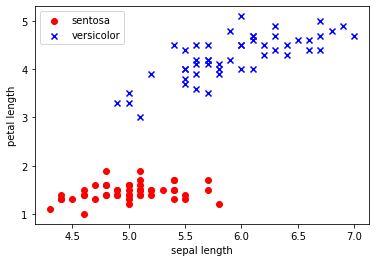

In [ ]:
# 산점도 그리기
plt.scatter(X[:50,0], X[:50,1], color = 'red', marker = 'o', label = 'sentosa')
plt.scatter(X[50:100,0], X[50:100,1], color = 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc = 'upper left')
plt.show()

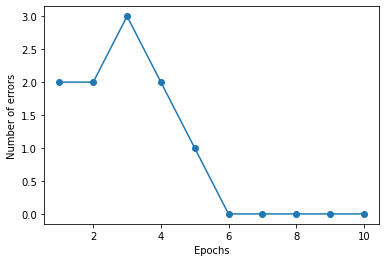

In [ ]:
ppn = perceptron(eta = 0.1, n_iter = 10) # 학습률 0.1, 반복횟수 :10
ppn.fit(X,y) # 퍼셉트론 훈련
plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # x1 feature의 최소/최대값
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # x2 feature의 최소/최대값
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution)) # x1, x2 범위 안에서 격자 그리드 만들기 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # 각 grid를 예측하기
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) # 등치선(동일한 높이값을 가지는 인접한 지점을 연속적으로 이어 구성한) 그리기
                                                    # contourf([X, Y,] Z(높이), [levels], **kwargs)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #샘플의 산점도
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')


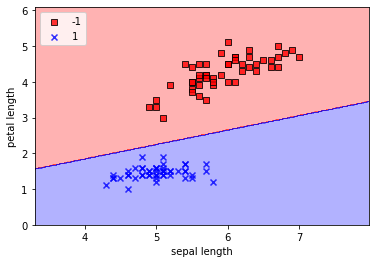

In [ ]:
plot_decision_regions(X,y,classifier = ppn)
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend(loc = 'upper left')
plt.show()

적응형 선형 뉴런(ADAptive LInear NEuron, ADALINE)   
연속함수를 비용함수로 정의하고 최소화하는 알고리즘, 퍼셉트론과의 가장 큰 차이점은 기증치를 업데이트하는 데 단위 계단 함수 대신 선형 활성화 함수($\phi(x)$)를 사용한다는 것이다.   
$$\phi(Z) = w^Tx $$
선형 활성화 함수가 가중치 학습에 사용되지만, 최종 예측을 만드는 데에는 여전히 임계함수(step function)이 사용된다.  

아달린 vs 퍼셉트론:   
퍼셉트론이 예측값과 실제값을 비교해서 가중치를 업데이트 했다면, 아달린은 활성화 함수에서 나온값과 실제값을 비교한다. 그리고 그 오차를 비용함수라 부른다.   
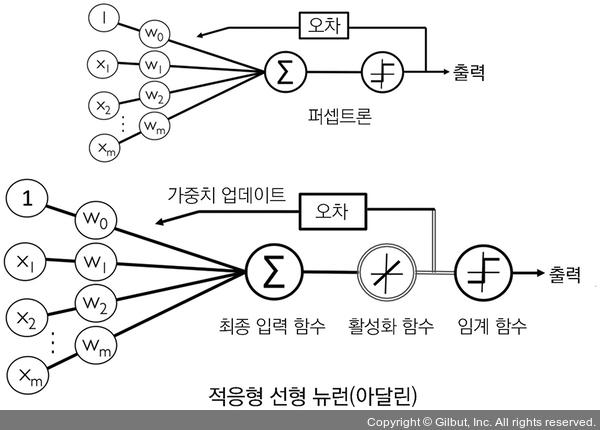

아달린의 비용함수 $J(w)$:   
$$J(w) = \frac{1}{2}\sum (y^{(i)} - \phi(z^{(i)}))^2$$   
계산된 출력과 진짜 클래스 레이블 사이의 제공 오차합(Sum of Squared Errors, SSE)   

경사하강법:   
단위 계단 함수 대신에 연속적인 선형 활성화 함수를 사용하여 얻는 이득은 비용함수가 미분가능해지고, 볼록함수가 된다는 것이다. 이러한 특성들을 활용해서 어떤 점에서의 gradient(그 점에서 기울기가 가장 빠르게 증가하는 방향)의 반대 방향으로 나아가 극솟값에 도달하는 방법인 gradient descent를 사용하면 비용함수의 최소치(전역 최소 비용)으로 도달할 수 있다.   


배치 경사 하강법(BGD):   
전체 학습 데이터를 하나의 배치로 묶어 학습시키는 경사 하강법   
$$\\w:= w+ \Delta w\\
\Delta w = -\eta \bigtriangledown J(w)\\
 \frac{\partial J}{\partial w_j} = -\sum_{i=1}(y^{(i)} - \phi z^{(i)}) x^{(i)}_j$$

확률적 경사 하강법(SGD):   
전체 데이터 중 하나의 데이터를 이용하여 경사 하강법을 1회 진행하는 방법, 배치 경사 하강법보다 계산비용이 적고 가중치 업데이트 속도가 훨씬 빠르다. 그러나 하나의 데이터만을 보고 가중치를 업데이트하기 때문에 비용함수의 수렴이 안정적이지 못하다.   
$$\\w:= w+ \Delta w\\
\Delta w = -\eta \bigtriangledown J(w)\\
 \frac{\partial J}{\partial w_j} = -(y^{(i)} - \phi z^{(i)}) x^{(i)}$$
미니 배치 경사 하강법(MSGD):   
BGD와 SGD의 절충안으로 전체 데이터를 batch_size개씩 나눠 배치로 학습하는 것이다.

In [ ]:
# 파이썬으로 BGD 적응형 선형 뉴런(ADALINE)(퍼셉트론의 향상된 버전)구현

class AdalineGD(object):
  # 적응형 선형 뉴런 분류기
  # 매개변수:
  # eta: float, 학습률(0.0~1.0)
  # n_iter: int, 훈련 데이터셋 반복 횟수
  # randomstate: int, 가중치 무작위 초기화를 위한 난수 생성기 시드
  #
  # 속성:
  # w_: 1d-array, 학습된 가중치
  # cost_: list, 에포크마다 누적된 비용 함수의 제곱합

  def __init__(self, eta =0.01, n_iter = 50, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    # 훈련 데이터 학습
    # 매개변수:
    # X: {array-like}, shape = [n_samples, n_features]
    # n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
    # y: array_like, shape = [n_samples], 타깃값
    #
    # 반환값
    # self: object

    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1]) # (특성 + bias)의 개수만큼 가중치 생성

    self.cost_= []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y-output)
      self.w_[1:] += self.eta * X.T.dot(errors) # 비용함수를 편미분한 삭으로 가중치 업데이트
      self.w_[0] += self.eta * errors.sum() # 비용함수를 편미분한 식으로  bias 업데이트
      cost = (errors**2).sum() /2.0 # 비용함수 계산
      self.cost_.append(cost)
    return self

  def net_input(self,X):
    # 최종 입력 계산
    return np.dot(X, self.w_[1:] + self.w_[0])
  
  def activation(self, X):
    # 선형 활성화 계산
    return X

  def predict(self, X):
    # 계단 함수를 사용하여 클래스 레이블 반환
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1 , -1)



Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

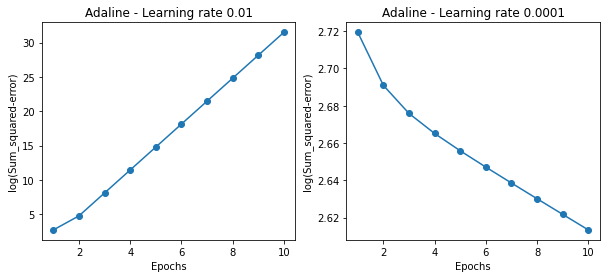

In [ ]:
# 학습률(0.01, 0.0001)에 따른 비용함수 그래프
from matplotlib import pyplot as plt

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ada1 = AdalineGD(n_iter = 10, eta = 0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_)+1), np.log10(ada1.cost_)+1, marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum_squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter = 10, eta = 0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_)+1), np.log10(ada2.cost_)+1, marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum_squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')


## eta = 0.01, 학습률이 너무 커서 비용함수 증가
## eta = 0.0001 학습률이 너무 작아서 비용함수 감소율이 너무 적음

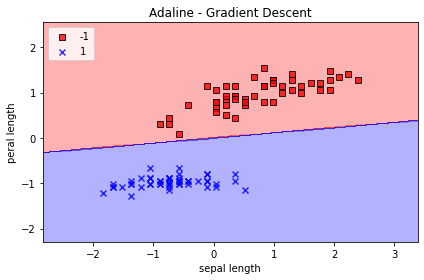

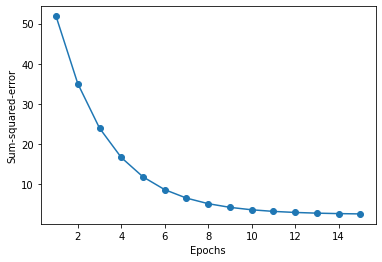

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = ss.fit_transform(X) # X 표준화, standardization

# 아달린 훈련
ada = AdalineGD(n_iter = 15, eta = 0.01)
ada.fit(X,y)

plot_decision_regions(X, y, classifier = ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length')
plt.ylabel('peral length')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1,len(ada.cost_)+1),ada.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()


## 같은 학습률(eta=0.01)임에도, 데이터가 표준화되니 모델이 수렴한다.

In [ ]:
# 파이썬으로 SGD 적응형 선형 뉴런(ADALINE)(퍼셉트론의 향상된 버전)구현

class AdalineSGD(object):
  # 적응형 선형 뉴런 분류기
  # 매개변수:
  # eta: float, 학습률(0.0~1.0)
  # n_iter: int, 훈련 데이터셋 반복 횟수
  # suffle: boolean(default: True), True로 설정하면 같은 반복이 되지 않도록 에포크(모든 데이터를 한번씩 사용한 횟수)마다 훈련데이터를 섞습니다.
  # randomstate: int, 가중치 무작위 초기화를 위한 난수 생성기 시드
  #
  # 속성:
  # w_: 1d-array, 학습된 가중치
  # cost_: list, 에포크마다 누적된 비용 함수의 제곱합

  def __init__(self, eta =0.01, n_iter = 50, shuffle = True ,random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.w_initialized = False
    self.shuffle = shuffle
    self.random_state = random_state

  def fit(self, X, y):
    # 훈련 데이터 학습
    # 매개변수:
    # X: {array-like}, shape = [n_samples, n_features]
    # n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
    # y: array_like, shape = [n_samples], 타깃값
    #
    # 반환값
    # self: object

    self._initialize_weights(X.shape[1])
    self.cost_= []

    for i in range(self.n_iter):
      if self.shuffle:
        X,y = self._shuffle(X,y)
      cost = []
      for xi, target in zip(X,y):
        cost.append(self._update_weights(xi,target))
      avg_cost = sum(cost) / len(y)
      self.cost_.append(avg_cost)
    return self

  def partial_fit(self,X,y):
    # 가중치를 초기화하지 않고 훈련 데이터 학습
    if not self.w_initialized:
      self._initialize_weights(X.shape[1])
    if y.ravel().shape[0] > 1:
      for xi, target in zip(X,y):
        self._update_weights(xi, target)
    else:
      self._update_weights(X,y)
    return self

  def _shuffle(self, X, y):
    # 훈련 데이터를 섞기
    r = self.rgen.permutation(len(y)) # permutation(m): 1~m까지의 array 섞어서 반환
    return X[r], y[r]

  def _initialize_weights(self, m):
    # 랜덤한 작은 수로 가중치 초기화
    self.rgen = np.random.RandomState(self.random_state)
    self.w_ = self.rgen.normal(loc = 0.0, scale = 0.01, size = 1+m)
    self.w_initialized = True

  def _update_weights(self,xi,target):
    # 아달린 학습 규칙을 적용하여 가중치 업데이트
    output = self.activation(self.net_input(xi))
    error = (target - output)
    self.w_[1:] += self.eta * xi.dot(error)
    self.w_[0] += self.eta * error
    cost = 0.5 * error**2
    return cost

  def net_input(self,X):
    # 최종 입력 계산
    return np.dot(X, self.w_[1:] + self.w_[0])
  
  def activation(self, X):
    # 선형 활성화 계산
    return X

  def predict(self, X):
    # 계단 함수를 사용하여 클래스 레이블 반환
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1 , -1)


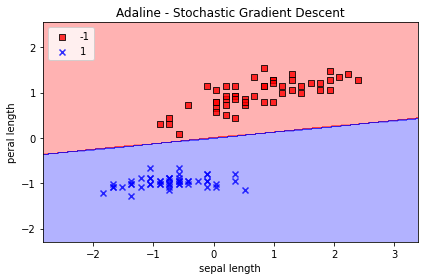

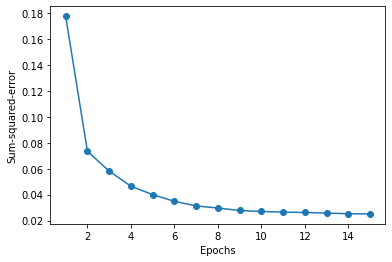

In [ ]:
ada = AdalineSGD(n_iter=15,eta = 0.01, random_state=1)
ada.fit(X,y)

plot_decision_regions(X, y, classifier = ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length')
plt.ylabel('peral length')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1,len(ada.cost_)+1),ada.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

## GD보다 빠르게 비용함수의 감소가 일어난다

오즈비(odds ratio):   
특정 이벤트가 발생할 확률
$$\frac{P}{1-P}\;\;(P = 양성\:샘플일\:확률)\;\; 범위 (0,∞)$$
로짓함수(logit):
odds ratio에 로그함수를 씌운 함수
$$logit(P) = log(\frac{P}{1-P})\;\; 범위 (-∞, ∞)$$
시그모이드 함수(sigmoid):  
로짓함수의 버무이가 실수이므로 이 값에 대한 선형 회귀 분석을 실시하면
$$\\
log(\frac{P}{1-P}) = f(x)= wx +b\\
P =  \frac{1}{1+e^{-f(x)}} =  \frac{1}{1+e^{-(wx+b)}} $$
$$ sigmoid(z) =  \frac{1}{1+e^{z}} \;\; (-∞ ,∞)의\; 값을\; 받아\; (0,1)\; 값을\; return한다$$

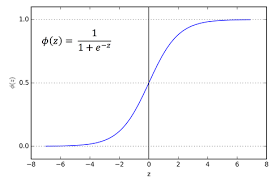


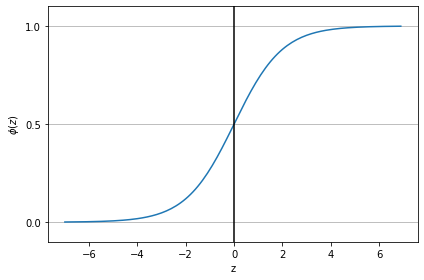

In [ ]:
# 시그모이드(sigmoid) 함수 그리기
import matplotlib.pyplot as plt
def sigmoid(z):
  return 1.0/(1.0 + np.exp(-z))

z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color = 'k') # 세로(vertical) 수평선 그리기, axhline = 가로(horizontal) 수평선 그리기
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0,0.5,1.0]) # y축 눈금과 격자선
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

Adaline vs logistic regression
아달린은 선형 활성화 함수를 활용하지만, 로지스틱 회귀는 시그모이드 함수를 사용하여 가중치와 입력값의 선형결합을 확률적으로 해석할 수 있다.   
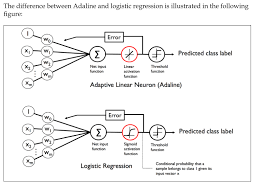

확률(probability):   
주어진 확률 분포가 있을 때, 관측값 또는 관측 구간이 분포 안에서 얼마의 확률로 존재하는가를 나타내는 값.
 $$ Probability = P(X|D) \;\; X는\; 관측값,\; D는\; 확률분포$$

ex.    
평균32 표준편차 2.5를 갖는 정규분포에서 무게가 32-34사이로 관측될 확률= 빨간 영역   
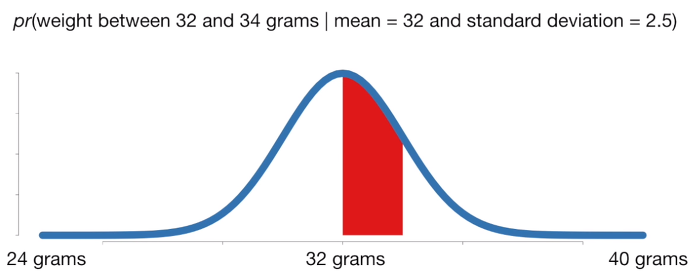   
가능도(likelihood):    
어떤 값이 관측되었을 때, 이것이 어떤 확률 분포에서 왔을 확률
$$Likelihood = L(D|X)\;\; X는\; 관측값,\; D는\; 확률분포$$
ex.   
무게가 34g 일때 이 관측 결과가 정규분포(m = 32, std = 2.5)에서 나왔을 확률   
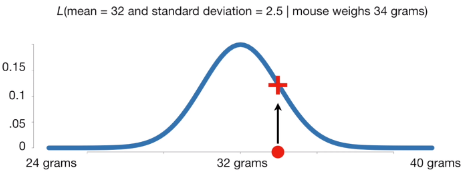

로지스틱 회귀모델에서의 최대화하려는 가능도:   
$$\\
L(w) = p(y|x;w)\\
= \prod_{i=1}^{n}P(y^{(i)}|x^{(i)};w)\\
=  \prod_{i=1}^{n}(\phi (z^{(i)}))^{y^{(i)}}(1-\phi (z^{(i)}))^{1-y^{(i)}}$$

클래스가 양성일 경우: $(\phi (z^{(i)}))^{y^{(i)}}$에 해당   
클래스가 음성일 경우: $(1-\phi (z^{(i)}))^{1-y^{(i)}}$에 해당

로그 가능도 함수($l(w))$), 로지스틱 비용함수($J(w)$):   
자연로그를 씌워서 계산의 편의성 증진   
$$l(w) = logL(w) = \sum_{i=1}^{n}\left [ y^{(i)}log(\phi(z^{(i)})) + (1-y^{(i)})log(1-\phi(z^{(i)})) \right ]$$
$$J(w) = -\sum_{i=1}^{n}\left [ y^{(i)}log(\phi(z^{(i)})) + (1-y^{(i)})log(1-\phi(z^{(i)})) \right ]$$

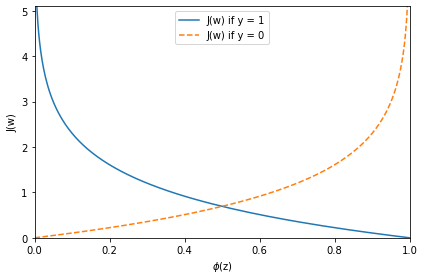

In [ ]:
#로지스틱 비용함수 그리기
def cost_1(z):
  return -np.log(sigmoid(z))
def cost_0(z):
  return -np.log(1-sigmoid(z))

z = np.arange(-10,10,0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y = 1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y = 0')
plt.ylim(0.0,5.1)
plt.xlim([0,1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

## y=1일때 1로 예측할수록 비용이 0에 가까워진다
## y=0일때 0으로 예측할수록 비용이 0에 가까워진다
## 잘못된 예측에 점점 더 큰 비용을 부여한다.

In [ ]:
# 파이썬으로 로지스틱 회귀 구현
class LogisticRegressionGD(object):
  # 경사하강법을 사용한 로지스틱 회귀 분류기
  # 매개변수:
  # eta: float, 학습률(0.0~1.0)
  # n_iter: int, 훈련 데이터셋 반복 횟수
  # radnom_state: int, 가중치 무작위 초기화를 위한 난수 생성기 시드
  # 
  # 속성:
  # w_: 1d-array, 학습된 가중치
  # cost_: list, 에포크마다 누적된 로지스틱 비용 함수 값

  def __init__(self, eta = 0.05, n_iter = 100, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self,X,y):
    # 훈련 데이터 학습
    # 매개변수:
    # X: {array-like} shape = [n_samples, n_features]
    # n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
    # y: array-like, shape = [n_samples], 타깃값
    # 반환값
    # self: object

    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale = 0.01, size = 1+X.shape[1]) # 특성 + bias

    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y-output)

      # 로지스틱 비용함수의 편미분값 : X.T * diff / n (n은 생략)
      # 증명: https://stats.stackexchange.com/questions/278771/how-is-the-cost-function-from-logistic-regression-derivated
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()

      # 오차 제곱합 대신 로지스틱 비용 계산
      cost = (-y.dot(np.log(output))-((1-y).dot(np.log(1-output))))
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    # 최종 입력 계산
    return np.dot(X,self.w_[1:]) + self.w_[0]
  
  def activation(self, z):
    # 로지스틱 시그모이드 활성화 계산
    return 1./(1. + np.exp(-np.clip(z,-250,250))) # 계산오류방지
  
  def predict(self, X):
    # 단위 계단 함수를 사용하여 클래스 레이블 반환
    return np.where(self.activation(self.net_input(X))>=0.5,1,0)


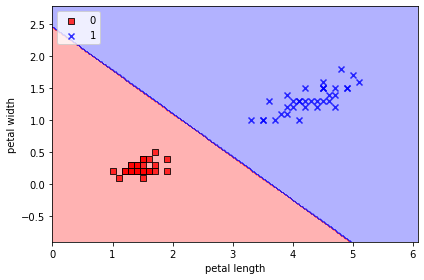

In [ ]:
X_train_01_subset = X_train[(y_train==0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train==0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta = 0.05, n_iter = 1000, random_state = 1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X = X_train_01_subset, y = y_train_01_subset, classifier = lrgd)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

## 2-2. 퍼셉트론, 아달린, 선형회귀 (sklearn 사용)

In [ ]:
# 파이썬 데이터셋 가져오기
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print("클래스 레이블: ", np.unique(y))

클래스 레이블:  [0 1 2]


In [ ]:
# 데이터세트 훈련과 평가 세트로 변환
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 1, stratify = y)

In [ ]:
# 레이블 카운드, np.bincount(), 0부터 가장 큰 값까지 각각의 발생빈도수 반환
print("y 레이블 카운트:", np.bincount(y))
print("y_train 레이블 카운드:", np.bincount(y_train))
print("y_test 레이블 카운트", np.bincount(y_test))

## stratify = y로 데이터셋을 나눴기 때문에 레이블마다 같은 비율로 데이터셋이 구성되어있다

y 레이블 카운트: [50 50 50]
y_train 레이블 카운드: [35 35 35]
y_test 레이블 카운트 [15 15 15]


In [ ]:
# 스케일 조정
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# 퍼셉트론 훈련하기
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(max_iter=40, eta0 = 0.1, tol = 1e-3, random_state = 1) # tol= 최적화 허용오차
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print("정확도: ", accuracy_score(y_test, y_pred))

정확도:  0.9777777777777777


In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # x1 feature의 최소/최대값
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # x2 feature의 최소/최대값
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution)) # x1, x2 범위 안에서 격자 그리드 만들기 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # 각 grid를 예측하기
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) # 등치선(동일한 높이값을 가지는 인접한 지점을 연속적으로 이어 구성한) 그리기
                                                    # contourf([X, Y,] Z(높이), [levels], **kwargs)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #샘플의 산점도
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
    if test_idx:
      X_test,y_test = X[test_idx,:], y[test_idx]
      plt.scatter(X_test[:,0],X_test[:,1], c='',edgecolor='black', alpha = 1.0, linewidth= 1, marker = 'o', s = 100, label= 'test set')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


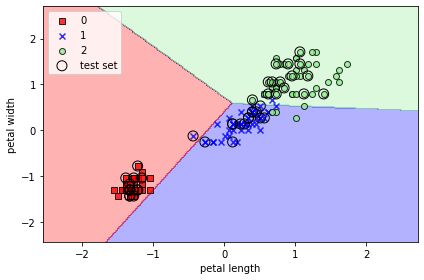

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std)) # numpy 세로로 결합
y_combined = np.hstack((y_train, y_test)) # numpy 가로결합
plot_decision_regions(X = X_combined_std, y = y_combined, classifier = ppn, test_idx = range(105,150))
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()
plt.tight_layout()
plt.show()

## 퍼셉트론은 데이터셋이 선형적으로 구분되지 않을 때 가중치 업데이트가 계속해서 일어나므로 수렴할 수 없다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


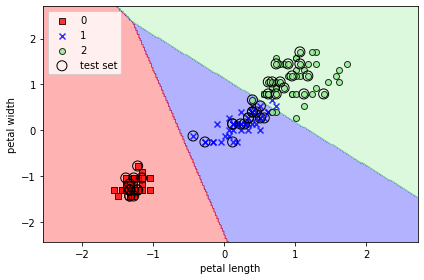

In [ ]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class= 'auto', C = 100.0, random_state = 1) # C는 규제, 규제는 선형 회귀에서..
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx = range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [ ]:
# 클래스 소속 확률
print("클래스 소속 확률: \n", lr.predict_proba(X_test_std[:3,:]))
print(" 각 확률들의 합: \n", np.sum(lr.predict_proba(X_test_std[:3,:]), axis = 1))


## 첫번째 붓꽃은 클래스 3에 속할 확률이 약 85%

클래스 소속 확률: 
 [[3.17983737e-08 1.44886616e-01 8.55113353e-01]
 [8.33962295e-01 1.66037705e-01 4.55557009e-12]
 [8.48762934e-01 1.51237066e-01 4.63166788e-13]]
 각 확률들의 합: 
 [1. 1. 1.]


로지스틱 회귀 장점:   
 - 클래스 분류 확률값을 얻을 수 있다
 - 소프트맥스 함수를 사용하여 다중 분류로 사용할 수 있다

로지스틱 회귀 단점:
 - 교호작용(ex.설명변수끼리의 상호작용) 값을 수동으로 추가해주어야한다
 (ex. 나이와 수입보다 나이에 따른 수입 변수가 더 설명력있는 변수일 수 있음)
 - 가중치 해석이 어렵다

## 2-3. 서포트 벡터 머신(**SVM 분류**)

SVM(서포트 벡터 머신):   
SVM은 퍼셉트론의 확장으로 생각할 수 있다. 퍼셉트론 알고리즘이 분류 오차를 최소화한다면, SVM은 결정경계(Decision Boundary)를 설정하여 마진(Margin)을 최적화한다.

결정경계(Decision Boundary):   
양성 클래스와 음성클래스를 나누는 경계, 2차원에서는 선, 3차원에서는 평면, 고차원에서는 초평면이 결정경계이다.   

마진(Margin):   
결정 경계와 서포트 벡터(Support Vector, 결정 경계와 가가이 있는 데이터 포인트) 사이의 거리     
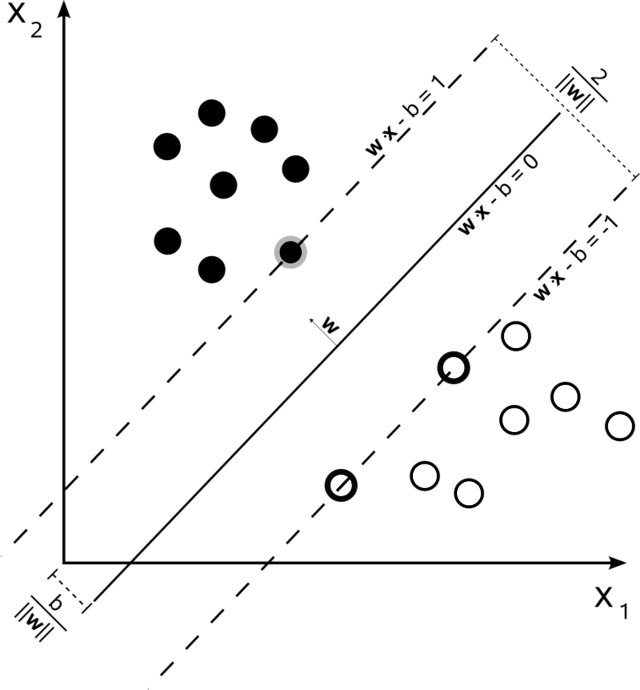 
     
마진의 최대화:   
$$결정\; 경계: w_0 + w^Tx = 0\\ 양성\; 초평면: w_0 + w^Tx_{pos}=1\\ 음성\; 초평면: w_0 + w^Tx_{neg}=-1$$
$$양성 초평면  - 음성초평면: w^T(x_{pos} - x_{neg}) = 2$$
$$w의 \; L_2\;norm = ||w|| = \sqrt{\sum_{j =1}^{m}w^2_j}$$
$$양성\; 초평면과\; 음성\; 초평면의\; 거리:\frac{w^T(x_{pos} - x_{neg})}{||w||} = \frac{2}{||w||} $$
$$\therefore 마진의\; 최대화 = \frac{2}{||w||}의\; 최대화$$   

SVM의 비용함수:   
샘플이 정확하게 분류된다는 제약 조건에서 $\frac{2}{||w||}$의 최대화
$$샘플이\; 정확하게\; 분류된다는\; 제약 조건: y^{(i)}(w_0 + w^Tx^{(i)})\geq 1\;\;\forall _i $$

하드 마진 분류:   
모든 샘플이 선형적으로 구분되어 결정경계 바깥쪽에 잘 분류되어 있음. 이상치에 민감한 단점이 있다.   
ex. 클래스 A와 B를 나누려고 하는데, B 샘플들의 한가운데에 이상치인 A 샘플이 있다면 하드 마진 분류는 결정경계를 그릴 수 없다.   

소프트 마진 분류:   
마진을 가능한 한 넓게 유지하는 것과 마진 오류 사이에 적절한 균형을 가지고 분류하는 모델. 이상치가 있어도 슬랙변수 $\xi $(잘못 분류된 데이터로부터 해당 클래스의 결정 경계까지의 거리)를 추가함으로서 잘못 분류된 데이터가 클래스 평면분류 평면보다 아래(윗)부분에 존재할 수 있도록 허용한다.     

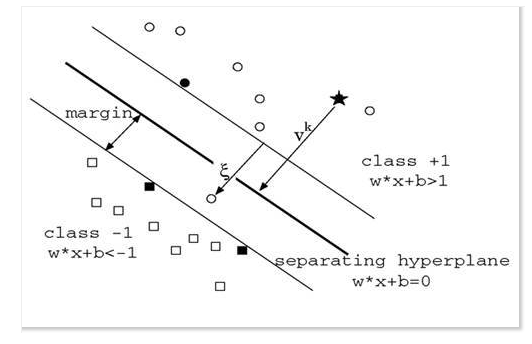
     
소프트 마진 서포트 벡터 머신의 비용함수:   
$$비용함수: \frac{1}{2}||w||^2 + C\left (  \sum_i{\xi ^{(i)}}\right )$$
C 값이 커지면 오차에 따른 비용이 높아지므로 오차에 엄격해진다.   
C 값이 작아지면 오차에 따른 비용이 상대적으로 낮아지므로 오차에 덜 엄격해진다



라그랑주 승수를 이용하여 서포트 벡터 원리 계산:   
https://gentlej90.tistory.com/43?category=688184   
https://gentlej90.tistory.com/44   


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


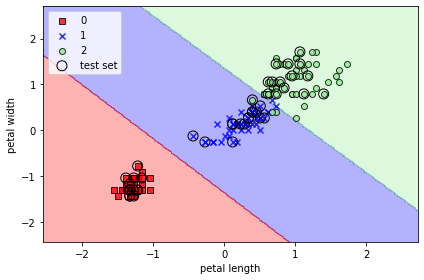

In [ ]:
# 사이킷런으로 SVM 사용하기
from sklearn.svm import SVC
svm = SVC(kernel = "linear", C = 1.0, random_state = 1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,classifier = svm, test_idx = range(105,150))
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

## svm 분류기는 logistic regression과는 달리 클래스에 대한 확률 제공 X
## svm은 규제에 편향을 포함시키기 때문에 데이터에 StandardScaler를 적용해야한다




In [ ]:
# SGDClassifier 확률적 경사 하강법 클래스

# SGDClassifier(loss = 'perceptron') # 퍼셉트론 경사 하강법
# SGDClassifier(loss = 'log') # 로지스틱 회귀 경사 하강법
# SGDClassifier(loss = 'hinge') # 커널 없는 SVM 경사 하강법

비선형 SVM 분류:   
데이터의 선형분류가 어려울 경우, 원공간(Input space)의 데이터를 선형 분류가 가능한 고차원 공간(feature space)로 매핑한 뒤 두 범주를 분류하는 초평면을 찾는다.   
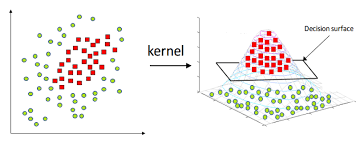

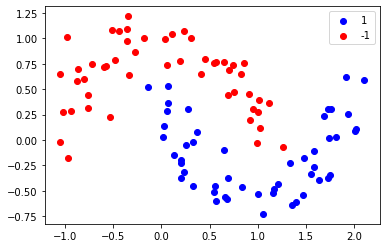

In [ ]:
# 비선형 데이터 가져오기 (moon)
from sklearn.datasets import make_moons

X,y = make_moons(n_samples = 100, noise = 0.15)

# 데이터 시각화 (moon)
plt.scatter(X[y==1,0],X[y==1,1], c='b', label = '1')
plt.scatter(X[y==0,0],X[y==0,1], c='r', label = '-1')
plt.legend()
plt.show()

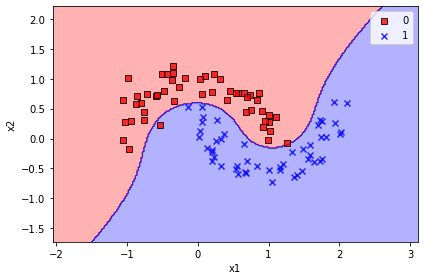

In [ ]:
# 다항 특성을 추가하여 SVM 활용하기 (moon)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline([
                               ("ploy_features", PolynomialFeatures(degree = 3)),
                               ("scaler", StandardScaler()),
                               ("svm_clf", LinearSVC(C=10, loss="hinge"))
])
polynomial_svm_clf.fit(X,y)

plot_decision_regions(X, y,classifier = polynomial_svm_clf)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

## 다항식을 추가하는 방법은 간단하고 잘 작동하지만 
## 낮은 차수의 다항식은 고차원 데이터셋을 잘 표현하지 못하고 높은 차수의 다항식은 많은 특성을 추가하므로 모델을 느리게 만든다

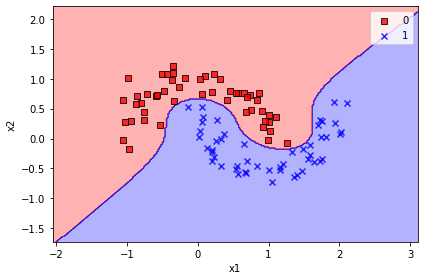

In [ ]:
# 다항식 커널을 사용하여 SVM 활용하기 (moon)
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
                                ("scaler", StandardScaler()),
                                ("svm_clf", SVC(kernel="poly", degree=6, coef0=1, C = 5))
])

poly_kernel_svm_clf.fit(X,y)

plot_decision_regions(X, y,classifier = poly_kernel_svm_clf)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

## 다항식 커널: (a X b  + r)^d
## a, b는 분류해야하는 두개의 서로 다른 데이터 포인트
## r은 다항식의 계수 결정
## d는 다항식의 차수 결정
## 데이터 포인트의 내적을 수행하여 특성 추가 없이 데이터에 대한 고차원 좌표 제공
## 모델이 과대적합이면 다항식의 차수를 줄여야한다
## coef0 = r 은 모델이 높은 차수나 낮은 차수에 얼마나 영향을 받을지 조절한다

In [ ]:
# Gaussian kernel을 사용하여 SVM 활용하기 gamma = 5, C = 1000 (moon)
## 가우시안 RBF(방사 기저 함수): exp(-gamma||x_1-x_2||^2) 
## -> 테일러 급수 전개를 활용하여 가우시안 커널이 무한차원으로의 사영임을 증명 할수 있음

rbf_kernel_svm_clf = Pipeline([
                               ("scaler", StandardScaler()),
                               ("svm_clf", SVC(kernel="rbf", gamma = 5, C = 1000))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1000, gamma=5))])

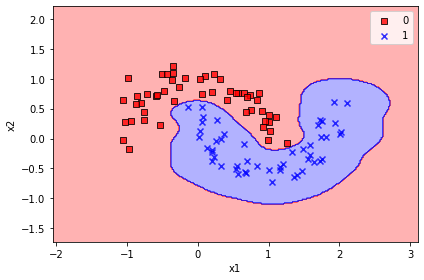

In [ ]:
plot_decision_regions(X, y,classifier = rbf_kernel_svm_clf)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# gamma = 5, C = 1000 SVM
## gamma 값이 크다는 것은 분산이 작은 가우시안 분포를 정의하며, 이는 두 점이 가까이 있어야만 유사하다고 판단할 수 있다.
## -> 결정 경계가 불규칙해지고 샘플을 따라 구불구불하게 휘어진다.

In [ ]:
# Gaussian kernel을 사용하여 SVM 활용하기 gamma = 0.1, C = 1000(moon)
## 가우시안 RBF(방사 기저 함수): exp(-gamma||x_1-x_2||^2) 
## -> 테일러 급수 전개를 활용하여 가우시안 커널이 무한차원으로의 사영임을 증명 할수 있음

rbf_kernel_svm_clf = Pipeline([
                               ("scaler", StandardScaler()),
                               ("svm_clf", SVC(kernel="rbf", gamma = 0.1, C = 1000))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1000, gamma=0.1))])

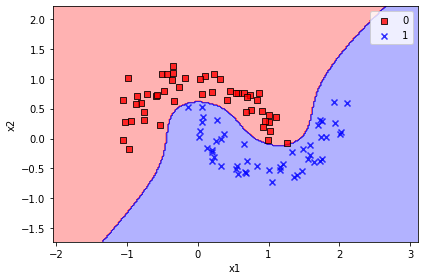

In [ ]:
plot_decision_regions(X, y,classifier = rbf_kernel_svm_clf)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# gamma = 0.1, C = 1000 SVM
## gamma 값이 작다는 것은 분산이 큰 가우시안 분포를 정의하며, 이는 두 점이 멀리 떨어져 있어도 유사하다고 판단할 수 있다.
## -> 결정 경계가 부드러워진다.

svm 분류를 위한 사이킷런 파이썬 클래스 비교   

|파이썬 클래스|시간 복잡도|외부 메모리 학습 지원|스케일 조정의 필요성|커널트릭|
|------|---|---|------|---|
|LinearSVC|O(m*n)|아니오|예|아니오|
|SGDClassifier|O(m*n)|예|예|아니오|
|SVC|O(m^2*n)~O(m^3*n)|아니오|예|예|

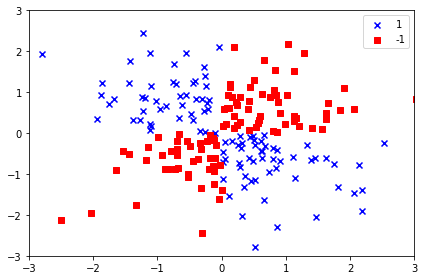

In [ ]:
# 비선형 데이터 가져오기 (XOR)
np.random.seed(1)
X_xor = np.random.randn(200,2) # 평균 0, 표준편차 1 (200,2) 난수 행렬 생성
y_xor = np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0 ) # xor 논리값 계산
y_xor = np.where(y_xor, 1 ,-1) # true면 1, false면 -1 반환

# 시각화
plt.scatter(X_xor[y_xor == 1,0],
            X_xor[y_xor == 1 ,1],
            c = 'b', marker = 'x', label = '1')
plt.scatter(X_xor[y_xor == -1,0],
            X_xor[y_xor == -1 ,1],
            c = 'r', marker = 's', label = '-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()


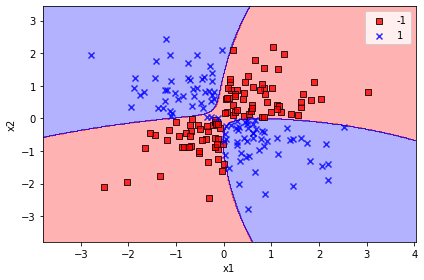

In [ ]:
# 다항식 커널을 사용하여 SVM 활용하기 (XOR)
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
                                ("scaler", StandardScaler()),
                                ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C = 5))
])

poly_kernel_svm_clf.fit(X_xor,y_xor)

plot_decision_regions(X_xor,y_xor,classifier = poly_kernel_svm_clf)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### 다항식 커널: (a X b  + r)^d = (a X b  + 1)^3
### 3차 다항식 커널 적용 

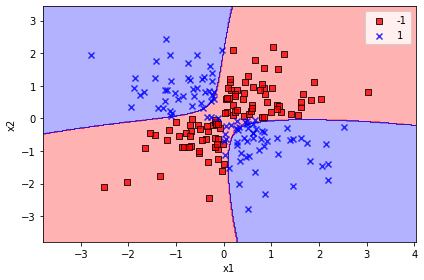

In [ ]:
# Gaussian kernel을 사용하여 SVM 활용하기 gamma = 0.1, C = 10(XOR)
## 가우시안 RBF(방사 기저 함수): exp(-gamma||x_1-x_2||^2) 

rbf_kernel_svm_clf = Pipeline([
                               ("scaler", StandardScaler()),
                               ("svm_clf", SVC(kernel="rbf", gamma = 0.1, C = 10))
])
rbf_kernel_svm_clf.fit(X_xor,y_xor)

plot_decision_regions(X_xor, y_xor,classifier = rbf_kernel_svm_clf)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

## gamma 값이 작다는 것은 분산이 큰 가우시안 분포를 정의하며, 이는 두 점이 멀리 떨어져 있어도 유사하다고 판단할 수 있다.
## -> 결정 경계가 부드러워진다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


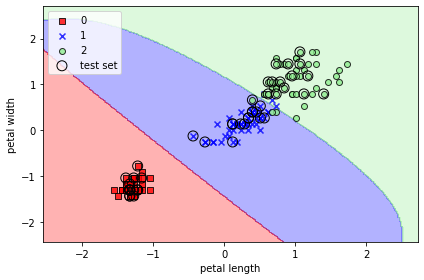

In [ ]:
# 붓꽃 데이터셋으로 gamma값에 따른 결정경계 파악하기
# 커널: 가우시안 RBF, gamma = 0.2, C = 1.0
svm = SVC(kernel = 'rbf', random_state = 1, gamma= 0.2, C = 1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier = svm, test_idx = range(105,150))
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

## 비교적 작은 감마 값으로 결정경계가 부드럽다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


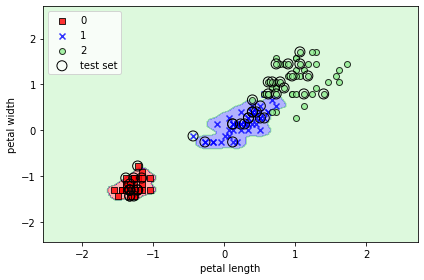

In [ ]:
# 붓꽃 데이터셋으로 gamma값에 따른 결정경계 파악하기
# 커널: 가우시안 RBF, gamma = 0.2, C = 1.0
svm = SVC(kernel = 'rbf', random_state = 1, gamma= 100, C = 1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier = svm, test_idx = range(105,150))
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

## 비교적 큰 감마 값으로 결정경계가 클래스 0과 1위주로 나타나 일반화 오차가 높게 나타난다.

++ svm 더 공부할 것:   
-  svm의 수학적 원리(라그랑주 승수), svm의 목적(비용)함수
-  커널(다항식 커널, 가우시안 커널(테일러 급수))
-  콰드라틱 프로그래밍
-  쌍대문제(dual problem)

SVM 장점:   
 - 이상치에 대해 영향이 적다
 - 과적합이 될 가능성이 낮고 사용하기 쉽다
 - 저차원이나 고차원의 적은 데이터에서 일반화 능력이 좋다

SVM 단점: 
 - 커널함수의 선택 기준이 명확하지 않다.
 - 고차원으로 갈수록 계산이 부담된다
 - 데이터 특성의 스케일링에 민감하다
 - 파라미터 조합, 커널함수 선택에 있어서 여러 조합 테스트가 필요하다
 - 직관적인 해석이 어렵다

## 2-4. 결정 트리(**Decision Tree 분류**)

결정트리(Decision tree):   
데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것

결정 트리 구성요소:   
 - Root Node: 깊이가 0인 꼭대기 노드, 전체 자료를 포함한다
 - Leaf(Terminal) Node: 자식 노드가 없는 마지막 노드
 - Parent Node: 주어진 마디의 상위마디
 - Child Node: 하나의 마디로부터 분리되어 나간 2개 이상의 마디들
 - Depth: 뿌리마디부터 끝마디까지의 중간 마디들의 수

의사 결정 나무 모형의 절차:   
 1. 성장(tree growing): 최대 크기의 나무 모형 형성
 2. 가지치기(pruning): 최대 크기 나무모형에서 불필요한 가지를 제거(분기를 합친다, merge 느낌)하여 부분 나무 모형의 집합을 탐색
 3. 최적 나무 모형 선택: 가지치기의 결과인 나무모형의 집합에서 최적 모형을 선택
 4. 해석 및 예측

의사 결정 나무는 정보 이득 최대화를 목표로 나무가지를 늘려간다.   

정보이득(IG, Information Gain):   
$IG(D_p, f)$: 부모노드 $D_p$를 특성 f로 분할 했을 때 얻는 정보 이득   
$D_p$: 부모노드, $D_j$: j번째 자식노드   
$N_p$: 부모노드의 샘플 수,   $N_j$: j번째 자식노드의 샘플 수
$$IG(D_p, f) = I(D_p) - \sum_{j=1}^{m}\frac{N_j}{N_p}I(D_j)$$
-> 부모노드의 불순도와 자식 노드의 불순도 합의 차이

결정트리가 이진 결정트리라면,   
$D_{left}$: 자식노드 1, $D_{right}$:  자식노드 2
$$IG(D_p, f) = I(D_p) - \frac{N_{left}}{N_p}I(D_{left}) - \frac{N_{right}}{N_p}I(D_{right})$$

불순도 지표: 
다양한 범주들의 개체들이 얼마나 포함되어 있는가에 대한 지표, 여러가지 클래스가 섞여 있는 정도   
$p(i|t)$: 특정 노드 t에서 클래스 i에 속한 샘플 비율

불순도 지표 - 1, 엔트로피 (entropy, $I_H$):
$$I_H(t) = -\sum_{i=1}^{c}p(i|t)log_2p(i|t)$$

불순도 지표 - 2, 지니 불순도 (Gini impurity, $I_G$):
$$I_G(t) = \sum_{i=1}^{c}p(i|t)(1-p(i|t)) = 1 - \sum_{i=1}^{c}p(i|t)^2$$

불순도 지표 - 3, 분류 오차 (classification error, $I_E$):   
$$I_E = 1-max(p(i|t))$$

엔트로피와 지니불순도는 모델의 성능에 큰 영향을 주지 않는다.   
엔트로피는 좀더 균형 잡힌 트리를 만들고, 지니 불순도는 계산이 빠르지만 지니 불순도가 가장 높은 클래스를 한쪽으로 고립시킨다.   
하지만 불순도지표는 미분이 되지 않고, 결정트리를 구성하는 데는 좋지 않다.

불순도 지표 비교:   

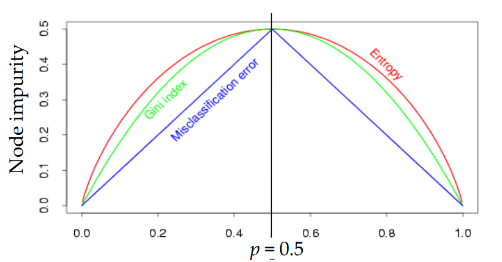

분기점(분리 기준 후보) 선정:   
feature가 연속형인 경우는 가질 수 있는 unique한 값을 후보로 정한다. 또는 각 unique한 값의 중앙값, 평균을 후보로 한다.   
feature가 범주형인 경우는 공집합과 전체집합을 제외하고 중복되지 않는 부분 집합을 고려한다.

모델학습 - 재귀적 분기(recursive partitioning):   
모든 분기점(분리 기준 후보)에 대해서 불순도 지표값을 구해 정보이득이 가장 큰 후보를 분기점으로 정하고 분기점의 조건에 따라 게속해서 서브 트리를 만들어간다.

모델학습 - 가지치기(pruning):   
모든 terminal node의 순도가 100%인 상태인 Full tree는 과적합의 우려가 있다. 이를 해결하기 위해서 가지치기를 해주어 모델을 일반화시킨다.   
관련 파라미터:   
 - min_samples_split: 노드를 분할하기 위한 최소한의 샘플 데이터 수
 - min_samples_leaf: 말단 노드가 되기 위한 최소한의 샘플 데이터 수
 - max_features:  최적의 분할을 위해 고려할 최대 피처 개수
 - max_depth: 트리의 최대 깊이
 - max_leaf_nodes: 말단 노드의 최대 개수


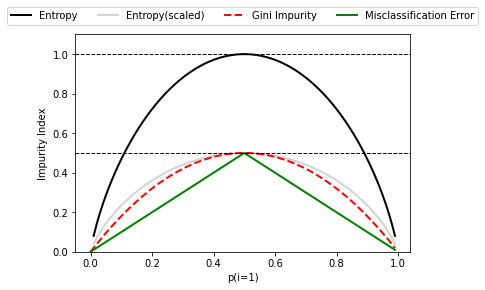

In [ ]:
# 불순도 지표 비교, Entropy, Entropy(scaled), Gini Impurity, Misclassification Error

def gini(p):
  # 지니 불순도
  return ((p) * (1-p)) + (1-p)*(1-(1-p))

def entropy(p):
  # 엔트로피
  return -p*np.log2(p) - (1-p)*np.log2((1-p))

def error(p):
  return 1-np.max([p,1-p])

x = np.arange(0.0,1.0,0.01)
ent = [entropy(p) if p !=0 else None for p in x] # entropy, log 0 때문에 none 처리
sc_ent = [e*0.5 if e else None for e in ent] # scaled entropy
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Entropy(scaled)', 'Gini Impurity', 'Misclassification Error'],
                         ['-','-','--','-'],
                         ['black','lightgray','red','green','cyan']):
  line = ax.plot(x, i, label = lab, linestyle = ls, lw = 2, color = c)
ax.legend(loc = "upper center", bbox_to_anchor = (0.5,1.15), ncol = 5, fancybox = True, shadow = False)
ax.axhline(y = 0.5, linewidth = 1, color = 'k', linestyle='--')
ax.axhline(y = 1.0, linewidth = 1, color = 'k', linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

In [ ]:
# 결정트리 훈련
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris() # 붓꽃 데이터 가져오기
X = iris.data[:,2:] # 꽃잎의 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(criterion= "gini") # criterion: {“gini”, “entropy”, “log_loss”}, default=”gini, criterion으로 불순도 지표 선택
tree_clf.fit(X,y)

DecisionTreeClassifier()

In [ ]:
# graphviz 환경설정
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

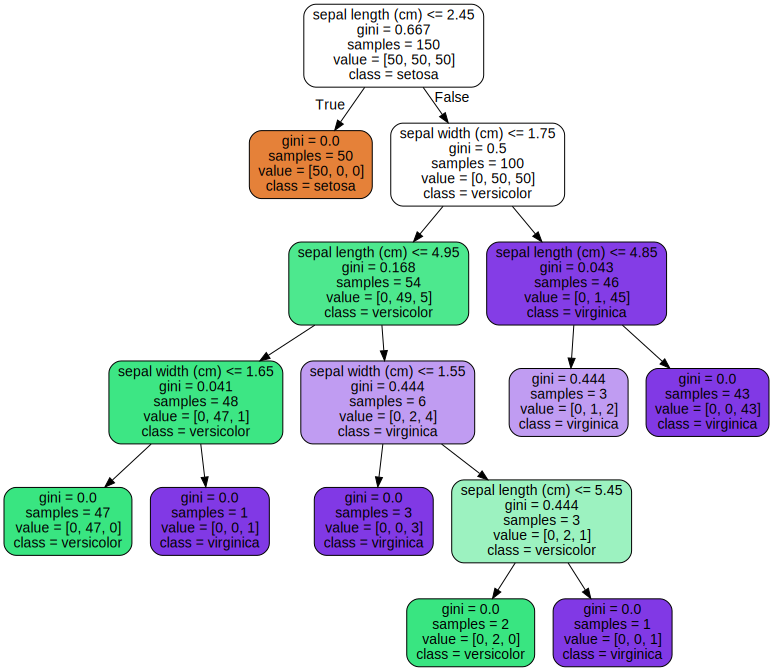

In [ ]:
# 트리 시각화 - 1
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[:2],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

## full tree -> overfitting의 위험

### gini: value=[]로 계산한 지니 계수
### value: 클래스 값 기반의 데이터 건수
### samples 현 규칙에 해당하는 데이터 건수
### class: 가장 많은 데이터의 클래스 명

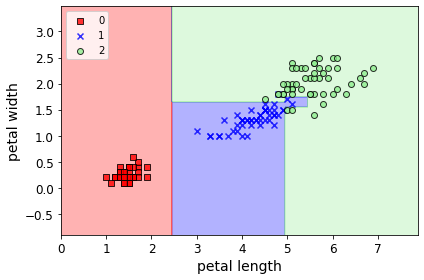

In [ ]:
# 트리 시각화 - 2
plot_decision_regions(X,y,classifier = tree_clf)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

## full tree

In [ ]:
# 선 - 가지치기(pre- pruning): 하이퍼파라미터 튜닝을 통해 full tree 구성을 완료하기 전에 early stopping
# 후 - 가지치기 (post-pruning): full tree를 구성한 후에 비용 복잡성 측정을 통해 가장 약한 링크를 가진 노드를 제거

In [ ]:
# pre-pruning 파라미터: 
 # min_samples_split: 노드를 분할하기 위한 최소한의 샘플 데이터 수
 # min_samples_leaf: 말단 노드가 되기 위한 최소한의 샘플 데이터 수
 # max_features:  최적의 분할을 위해 고려할 최대 피처 개수
 # max_depth: 트리의 최대 깊이
 # max_leaf_nodes: 말단 노드의 최대 개수

# 깊이 2인 트리 생성/훈련
tree_clf_depth = DecisionTreeClassifier(max_depth = 2)
tree_clf_depth.fit(X,y)

DecisionTreeClassifier(max_depth=2)

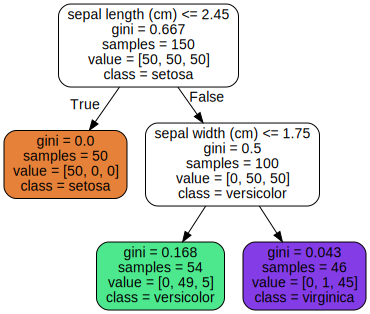

In [ ]:
#시각화 -1 (depth = 2)
export_graphviz(
        tree_clf_depth,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[:2],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

## 깊이가 2인 트리가 생겼다

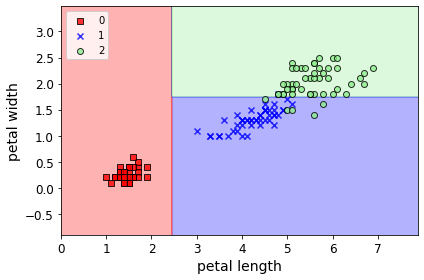

In [ ]:
#시각화 -2 (depth = 2)
plot_decision_regions(X,y,classifier = tree_clf_depth)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [ ]:
# min_samples_split = 4 인 트리 생성/훈련
tree_clf_split = DecisionTreeClassifier(min_samples_split = 4)
tree_clf_split.fit(X,y)

DecisionTreeClassifier(min_samples_split=4)

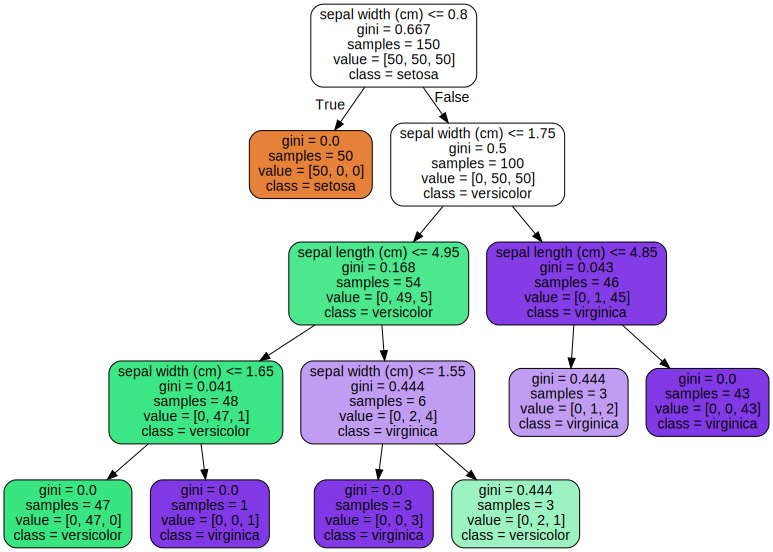

In [ ]:
#시각화 -1 (min_samples_split = 4)
export_graphviz(
        tree_clf_split,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[:2],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

## 지니 값이 0이 아닌데도 분할할 수 있는 최소 데이터 개수가 4라서 분할하지 못한 노드가 생겼다

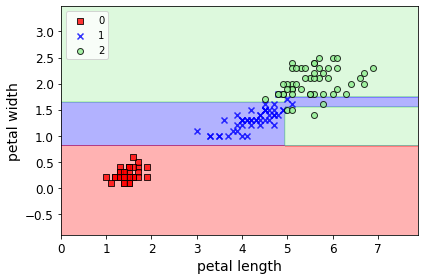

In [ ]:
#시각화 -2 (depth = 3)
plot_decision_regions(X,y,classifier = tree_clf_split)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

최소 비용 복잡성 가지치기(Minimal cost-complexity pruning):    
   
$$트리\; T의\; 복잡도\; 비용\; =\;R_\alpha(T) = R(T) + \alpha|\tilde{T}|$$
$|\tilde{T}|$은 터미널 노드의 수   
$R(T)$은 오분류 비율

In [ ]:
#  post-pruning
# cost_complexity_pruning_path: alpha와 그에 다른 불순도 반환
# ccp-alpha: 복잡도 비용 계수

tree_clf_alpha = DecisionTreeClassifier()
tree_clf_alpha.fit(X,y)
path = tree_clf_alpha.cost_complexity_pruning_path(X,y) # alpha와 그에 다른 불순도 반환

tree_clf_alpha_1 = DecisionTreeClassifier(ccp_alpha=0.02966049) #ccp alpha 설정
tree_clf_alpha_1.fit(X,y)


DecisionTreeClassifier(ccp_alpha=0.02966049)

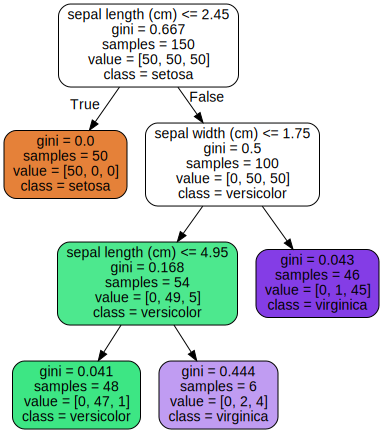

In [ ]:
#시각화 -1 (ccp_alpha=0.02966049)
export_graphviz(
        tree_clf_alpha_1,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[:2],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

## cpp -alpha 값에 따라 가지치기 되었다

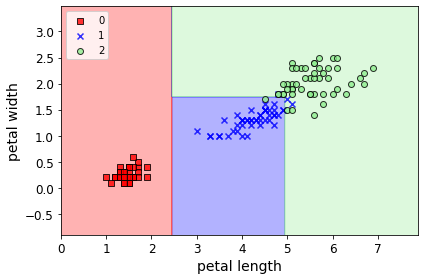

In [ ]:
#시각화 -2 (depth = 3)
plot_decision_regions(X,y,classifier = tree_clf_alpha_1)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [ ]:
# 클래스 확률 추정
tree_clf_depth.predict_proba([[5,1.5]]) #petal length=5, petal width = 1.5인 샘플이 각 클래스에 속할 확률

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
# 결정트리 실습(사용자 행동 인식 데이터 세트)

# 데이터 압축해제
import zipfile

zip = zipfile.ZipFile('/content/drive/MyDrive/colab_ML/data/HumanActivity/UCI HAR Dataset.zip')
zip.extractall('/content/drive/MyDrive/colab_ML/data/HumanActivity')
zip.close()

In [ ]:
# 데이터 가져오기 - feature name
feature_name_df = pd.read_csv('/content/drive/MyDrive/colab_ML/data/HumanActivity/UCI HAR Dataset/features.txt', sep ='\s+',
                              header = None, names = ['column_index', 'column_name']) # 정규표현식 \s+ (공백문자가 한번이상 반복됨)을 사용하여 parsing

feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출: ', feature_name[:10])

## 인체의 움직임과 관련된 속성의 평균/표준편차가 X,Y,Z 축 값으로 되어있다

전체 피처명에서 10개만 추출:  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [ ]:
# 데이터 가져오기 - X_train, X_test, y_train, y_test

def get_human_dataset():

  feature_name_df = pd.read_csv('/content/drive/MyDrive/colab_ML/data/HumanActivity/UCI HAR Dataset/features.txt', sep ='\s+',
                              header = None, names = ['column_index', 'column_name'])
  feature_name = feature_name_df.iloc[:,1].values.tolist() # 피처 이름을 리스트 객체로 전환
  
  X_train = pd.read_csv('/content/drive/MyDrive/colab_ML/data/HumanActivity/UCI HAR Dataset/train/X_train.txt', sep = '\s+',header = None )
  X_test = pd.read_csv('/content/drive/MyDrive/colab_ML/data/HumanActivity/UCI HAR Dataset/test/X_test.txt', sep = '\s+', header = None) 

  y_train = pd.read_csv('/content/drive/MyDrive/colab_ML/data/HumanActivity/UCI HAR Dataset/train/y_train.txt', sep = '\s+', header = None, names=['action']) 
  y_test = pd.read_csv('/content/drive/MyDrive/colab_ML/data/HumanActivity/UCI HAR Dataset/test/y_test.txt', sep = '\s+', header = None, names=['action']) 

  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
print("학습 피처 데이터셋 info()")
print(X_train.info())

## 7352개의 샘플, 561개의 feature

학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB
None


In [ ]:
print("레이블 값")
print(y_train.value_counts())

# 1~6 의 레이블 번호가 부여되어있다. 레이블값이 비교적 고르게 분포한다.

레이블 값
action
6         1407
5         1374
4         1286
1         1226
2         1073
3          986
dtype: int64


In [ ]:
# 결정트리를 활용하여 학습/예측
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("결정 트리 예측 정확도: {0:0.4f}".format(accuracy))

print("DecisionTreeClassifier 기본 하이퍼 파라미터:\n", dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [ ]:
# GridSearchCV로 max_depth 바꾸면서 성능 측정
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24]
}

#grid serach return_train_score  = True, crossvalidation에서 훈련데이터 정확도까지 반환
grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring='accuracy', cv = 5, verbose = 1, return_train_score  = True)
grid_cv.fit(X_train, y_train)
print('최고 평균 정확도 수치: {0:0.4f}'.format(grid_cv.best_score_))
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
최고 평균 정확도 수치: 0.8513
최적 하이퍼 파라미터:  {'max_depth': 16}


In [ ]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_) # grid_cv.cv_results_: 파라미터순으로 성능수치를 보여준다
cv_results_df[['param_max_depth','mean_test_score','mean_train_score']]

## 훈련데이터에서는 depth가 깊을 수록 정확도가 높지만, 검증 데이터 세트에서는 오히려 과적합으로 성능이 낮다

,param_max_depth,mean_test_score,mean_train_score
0,6,0.850791,0.944879
1,8,0.851069,0.982692
2,10,0.851209,0.993403
3,12,0.844135,0.997212
4,16,0.851344,0.999660
5,20,0.850800,0.999966
6,24,0.849440,1.000000


In [ ]:
# GridSearchCV로 max_depth, min_samples_split 바꾸면서 성능 측정
params = {
    'max_depth' : [6,8,10,12,16,20,24],
    'min_samples_split' : [16,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('최고 평균 정확도 수치: {0:0.4f}'.format(grid_cv.best_score_))
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
최고 평균 정확도 수치: 0.8549
최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:0.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


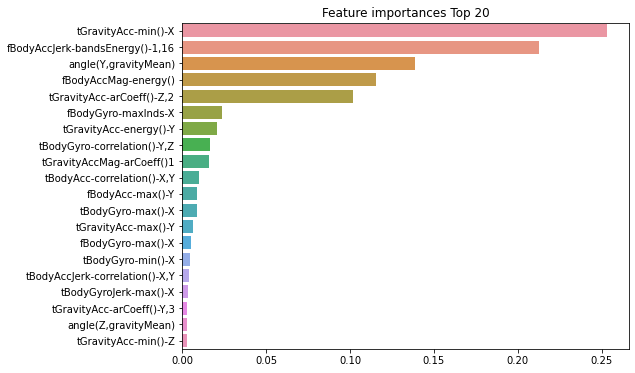

In [ ]:
# 결정트리에서 각 feature의 중요도 알아보기/시각화

# 노드 중요도  = 노드에서 불순도가 얼마나 크게 감소하였는가
# 각 feature의 중요도 = Gini importance, feature에 의해 나눠어진 노드들의 중요도 / 전체 노드의 중요도 합
# 불순도 기반 feature importance의 한계:
# 데이터를 학습하며 얻은 결과이므로 다소 학습 과정에 따라 다소 biased할 수 있다.

import seaborn as sns

ftr_importance_values = best_dt_clf.feature_importances_
# Series 변환
ftr_importances = pd.Series(ftr_importance_values, index = feature_name)
# 중요도값 순으로 Series 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize = (8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index, orient='h')
plt.show()

의사결정나무의 장점:
- 직관적인 해석이 가능하다
- 주요변수와 분리기준을 제시하여 결과 해석이 용이하다
- 통계모델에 요구되는 가정에 자유롭다(ex. 정규성, 독립성, 등분산성)
- 연속형 범주형 데이터 모두를 취급할 수 있다
- 비교적 빠른 모델 속도를 가지고 있다
- 데이터 특성의 스케일링에 큰 영향을 받지 않는다

의사결정나무 단점:   
- 데이터 수가 적을 경우 특히 불안정하다
- 과대적합 발생 가능성이 높다
- 전체적인 선형관계 파악에 미흡하다
- 연속형 변수를 구간화 처리하여 분리 경계점 근처에서 오류가 발생할 수 있다

## 2-5. 앙상블 학습(Ensemble Learning)

앙상블 학습:   
여러개의 분류기를 생성하고 그 예측을 결합함으로서 보다 정확한 예측을 도출하는 기법   
대부분의 정형 데이터 분류 시에는 앙상블이 뛰어난 성능을 나타내고 있다.

보팅(voting):   
여러개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식.
서로 다른 알고리즘을 여러개 결합하여 사용한다.   
하드보팅(Hard Voting):   
다수결 원칙과 같이, 예측한 결과값들 중 다수의 분류기가 결정한 예측값을 최종 voting 결과값으로 선정   
소프트보팅(Soft Voting):   
모든 분류기가 예측한 레이블 값의 결정확률 평균을 구한 뒤 가장 확률이 높은 레이블 값을 최종 voting 결과값으로 선정, 일반적으로 사용

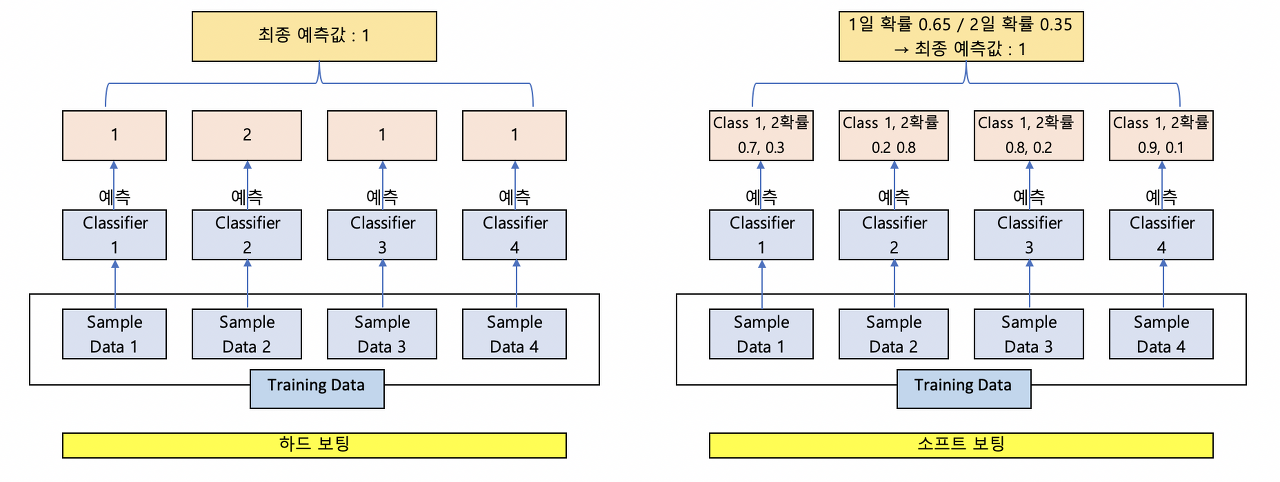

In [ ]:
# 데이터 가져오기(moon) / 나누기
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y = make_moons(n_samples = 500, noise = 0.25)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 1, stratify = y)

In [ ]:
# voting에 여러 모델 사용/평가
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression() #로지스틱 회귀
rnd_clf = RandomForestClassifier() # 랜덤 포레스트
svm_clf = SVC(probability=True) # 서포트 벡터 머신

# 하드보팅
voting_clf_hard = VotingClassifier(
    estimators=[('lr', log_clf),('rf',rnd_clf),('svc',svm_clf)],
    voting='hard'
)

# 소프트 보팅
voting_clf_soft = VotingClassifier(
    estimators=[('lr', log_clf),('rf',rnd_clf),('svc',svm_clf)],
    voting='soft'
)
for clf in (log_clf, rnd_clf, svm_clf, voting_clf_hard, voting_clf_soft):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.79
RandomForestClassifier 0.92
SVC 0.92
VotingClassifier 0.91
VotingClassifier 0.92


In [ ]:
# 데이터 가져오기(breast_cancer) / 나누기
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 156)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# voting에 여러 모델 사용/평가
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 8)

#소프트 보팅
vo_clf = VotingClassifier(estimators =[('lr', lr_clf),('KNN', knn_clf)], voting = 'soft')

for clf in (lr_clf,knn_clf, vo_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.89
KNeighborsClassifier 0.97
VotingClassifier 0.97


배깅(bootstrap aggregating):   
중복을 허용하여 데이터를 샘플링(복원추출하여 매번 다른 데이터로 학습)하여 같은 모델 알고리즘의 여러 Weak Tree들의 결과를 집계하는 방법   
각각의 Weak Tree가 독립적으로 학습되므로 병렬학습이 가능하고 이에 따라 학습 속도도 빠르다.

페이스팅(pasting):
중복을 허용하지 않고 데이터를 샘플링하여 같은 모델 알고리즘의 여러 Weak Tree들의 결과를 집계하는 방법

oob(out-of-bag) 평가:  
배깅에서 중복을 허용하여 훈현데이터셋에서 m개만큼 서브셋을 선택하면, 평균적으로 63%의 샘플만이 샘플링된다. 모델마다 남겨진 서로다른 37%의 선택되지 않는 oob 샘플을 활용하여 각 모델을 평가할 수 있다.

oob_score:  0.9275


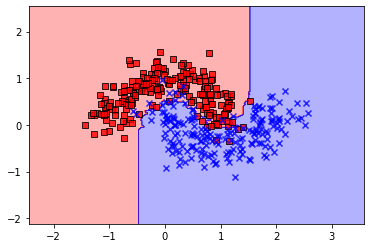

In [ ]:
# 의사결정나무로 이루어진 배깅을 이용하여 학습 / oob score 평가
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    max_samples = 100, bootstrap = True, n_jobs = -1, oob_score = True
) # bootstrap이 True이므로 배깅 방식을 사용한다, bootstrap이 False면 페이스팅
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print("oob_score: ", bag_clf.oob_score_) # 배깅에서만 평가할 수 있는 지표이며, 학습에 사용된 63.2%의 데이터를 제외하고 평가한 것이다

plot_decision_regions(X_train, y_train, bag_clf)
plt.show()

# 트리하나의 예측보다 일반화가 더 잘 되어있다.


## bagging vs pasting
## 부트스트래핑은 각 에측기가 학습하는 서브셋에 다양성을 증가시키므로 배깅이 페이스팅보다 편향이 조금 더 높고 분산이 더 낮다
## 일반적으로 배깅이 페이스팅보다 더 나은 모델을 만들지만, 교차검증으로 배깅과 페이스팅 모두를 평가해보는 것이 좋다

In [ ]:
from sklearn.metrics import accuracy_score
# mnist 데이터사용
# 특성 샘플링(랜덤 서브스페이스, random subspaces method), 샘플이 아니라 feature를 샘플링하여 학습
# 고차원의 데이터셋을 다룰 때 유용하다
bag_clf_subspace = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 100,
    max_features = 28, bootstrap = True, n_jobs = -1
) # bootstrap이 True이므로 배깅 방식을 사용한다, bootstrap이 False면 페이스팅
bag_clf_subspace.fit(X_train, y_train)
print('bag_clf_subspace accuracy_score: ', accuracy_score(y_test, bag_clf_subspace.predict(X_test)))



# 특성과 샘플을 모두 샘플링(랜덤 패치, random patches method)
# max_features 값과 max_sampels 값을 모두 설정

bag_clf_subspace accuracy_score:  0.9452


랜덤포레스트(Random Forest):   
랜덤포레스트는 의사결정나무들의 bagging을 통해서 만들어진 앙상블기법이다.

training set에서 bootstrap sampling 수행->   
전체 feature에서 특성 페이스팅->
만들어진 여러 학습모델을 합쳐서 예측

일반적으로, $\sqrt{feature의개수}$   
 값을 max_features 값으로 사용하고,
oob_score를 사용하지 않을 경우 모든 X_train 샘플을 학습한다




In [ ]:
# 데이터 가져오기(moon) / 나누기
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y = make_moons(n_samples = 500, noise = 0.25)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 1, stratify = y)

In [ ]:
# 랜덤포레스트 훈련 / 예측(get_human_dataset - 7352개의 샘플, 561개의 feature, label값 종류: 6개) 
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


랜덤 포레스트 정확도: 0.9253


In [ ]:
# 랜덤 포레스트 하이퍼파라미터 튜닝
# 랜덤 포레스트는 의사결정나무 + bagging의 하이퍼파라미터 모두를 가지고있기 때문에 하이퍼파라미터가 매우 많다
# 또한 하이퍼파라미터 튜닝에 들인 시간에 비해 예측성능이 크게 향상되는 경우가 많지 않다

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100],
    'max_depth': [6,8,10,12],
    'min_samples_leaf': [8,12,18],
    'min_samples_split': [8,16,20]
}

rf_clf = RandomForestClassifier(random_state = 0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1, scoring ="accuracy")
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


최적 하이퍼 파라미터: 
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


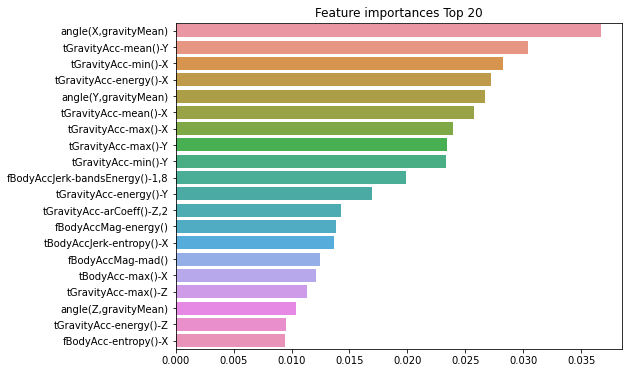

In [ ]:
#랜덤 포레스트의 feature_importances_

import seaborn as sns

rf_clf_best = grid_cv.best_estimator_

ftr_importances_values = rf_clf_best.feature_importances_
# Series 변환
ftr_importances = pd.Series(ftr_importances_values, index = feature_name)
# 중요도값 순으로 Series 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize = (8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index, orient='h')
plt.show()

익스트림 랜덤 트리(Extreme randomized tree, 엑스트라 트리(Extra-tree)):   
트리르 더욱 무작위 하게 만들기 위해 보통의 결정트리처럼 최적의 임곗값을 찾는 대신 후보 특성을 이용해 무작위로 분할한 다음 그중에서 최상의 분할을 찾는다.
최적의 임곗값(정보이득 계산)을 찾지 않기 때문에 매우 빠르게 학습된다

In [ ]:
# 엑스트라 트리로 minst 훈련 평가/ 랜덤 포레스트와 시간비교
from sklearn.ensemble import ExtraTreesClassifier
extra_clf = ExtraTreesClassifier(n_estimators = 100, max_features = 'sqrt' )
extra_clf.fit(X_train, y_train)
print('accuracy_score', accuracy_score(y_test, extra_clf.predict(X_test)))

# 1분 걸림
## 아니 왜 정확도 더 높은겨????

accuracy_score 0.9714


In [ ]:
# 엑스트라 트리로 minst 훈련 평가/ 랜덤 포레스트와 시간비교
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(n_estimators = 100, max_features = 'sqrt' )
rand_clf.fit(X_train, y_train)
print('accuracy_score', accuracy_score(y_test, rand_clf.predict(X_test)))

# 얘도 1분??

accuracy_score 0.9696


부스팅(boosting):
여러개의 약한 학습기를 연결하되, 앞의 모델을 보완시키는 방향으로 더욱 개선된 학습기를 만드는 방법   
배깅과는 반대로 순차적으로 학습하기에 하기에 학습속도가 배깅에 비해 현저히 느리다
가중치를 준 voting으로 결과를 산출한다

Adaboosting(에이다 부스트, adpative boosting):
약한 분류기들이 상호보완하도록 순차적으로 학습하고, 이들을 조합하여 최종적으로 강한 분류기의 성능을 향상   
먼저 학습된 분류기가 제대로 분류하지 못한 데이터에 가중치 값을 부여하여 다음 학습할 분류기가 잘못 분류된 데이터에 더 집중하여 학습하게 한다.
$$H(x) = \alpha_1h_1(x) + \alpha_2h_2(x) + \cdots \alpha_th_t(x) = \sum_{i = 1}^{t}\alpha_ih_i(x)$$

1. 각 샘플의 가중치는 초기에 $\frac{1}{m}$로 초기화
2. 첫번째 예측기가 학습되고 가중치가 적용된 에러율 $r와$ 예측기 가중치 $alpha$를 훈련 set에 대해 계산
$$r_j = \frac{
\sum_{i= 1, \hat{y}_j^{(i)} \neq y^{(i)}}^{m} w^{(i)}}
{
\sum_{i=1}^{m}w^{(i)}}, \;\; (예측이\; 틀린\; 샘플의\; 가중치의\; 합\;/\;전체\; 가중치의\; 합)$$ 
$$\hat{y}_j^{(i)}\; =\; i번째\; 샘플에\; 대한\; j번째\; 예측기의\; 예측$$
$$\alpha_j\; = \eta log(\frac{1-r_j}{r_j})$$
3. 샘플의 가중치 업데이트(잘못된 분류 샘플의 가중치가 커짐)
$$w^{(i)}\leftarrow \left \{ \begin{array}{cc} w^{(i)} \;\;\;\;\;\;\;\;\;\;\;\;\;\;if(\hat{y}^{(i)}_j = y^{(i)})\\
 w^{(i)}exp(\alpha_j)\;\; if(\hat{y}^{(i)}_j \neq y^{(i)})  \end{array} \right.$$
4. 모든 샘플의 가중치를 정규화(모든 가중치를 가중치의 합으로 나눈다)
5. 1-5의 과정을 반복하다가 지정된 예측기 수에 도달하거나 완벽한 예측기가 만들어지면 중단   

$\alpha$ 그래프:   
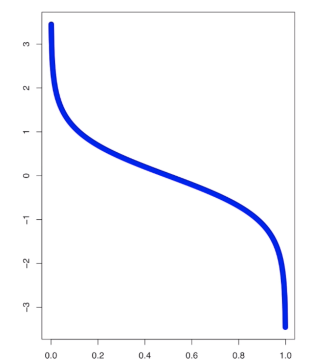

$$예측:\;\;\;\hat{y}(x) = argmax_k \sum_{j=1 , \hat{y}(x) = k}^{N}\alpha_j$$
$N$은 예측기 수   
총 가중치 합이 큰 클래스가 예측결과가 된다.

사이킷런은 SAMME라는 에이다 부스트의 다중 클래스 버전을 사용하고, 예측기가 클래스의 확률을 추정할 수 있다면(predict_proba()가 있다면) 사이킷러은 SAMME.R을 사용하며 이 알고리즘이 일반적으로 성능이 더 좋다

In [ ]:
# 데이터 가져오기(moon) / 나누기
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y = make_moons(n_samples = 500, noise = 0.25)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 1, stratify = y)


accuracy_score:  0.96


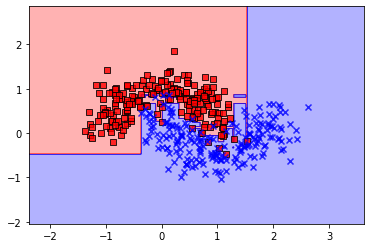

In [ ]:
# 에이다 부스트로 훈련/예측하기
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1), n_estimators = 200,
    algorithm = "SAMME.R", learning_rate = 0.5
) # WeakTree DecisionTreeClassifier(max_depth = 1)의 에이다 부스팅
ada_clf.fit(X_train, y_train)
print('accuracy_score: ', accuracy_score(y_test,ada_clf.predict(X_test)))

plot_decision_regions(X = X_train, y = y_train, classifier = ada_clf)


## depth = 1인 weak tree의 결합인데도 상당한 성능을 보여준다

그레디언트 부스팅(Gradient Boosting, GBM):   
에이다 부스트가 에러율에 따라 샘플의 가중치를 조절하였다면, 그레디언트 부스팅은 앙상블의 이전까지의 오차를 보정하도록 GD(gradient descent)를 사용하여 예측기를 순차적으로 추가한다.   
ex. 모델 A가 y를 예측하고 남은 잔차를 모델 B가 학습, 모델 B의 잔차를 ....

1. baseline 모델($F(x)$)로 $Y$를 예측하여 loss function $L$을 구한다
$$F_0 = argmin\sum_{i = 1}^{n}L(y_i,F(x_i))$$
2. 어떤 데이터 포인트에서 loss function이 줄어들기 위해 $F(x)$가 가려고하는 방향인 pseudo-residual(잔차, r)에 새로운 모델 fitting
$$r = -\frac{	\partial L(y_i, F(x_i))}{	\partial F(x_i)}$$
$(x_i, r_i)$에 모델 $h_m$ 학습
3. new model $F_m(x)$: $\gamma$는 매우 작은 값
$$F_m(x) = F_{m-1}(x) + \gamma h_m$$

오차에 대해 계속해서 학습하기 때문에 과적합을 방지해주어야하고 학습시간이 오래걸린다   
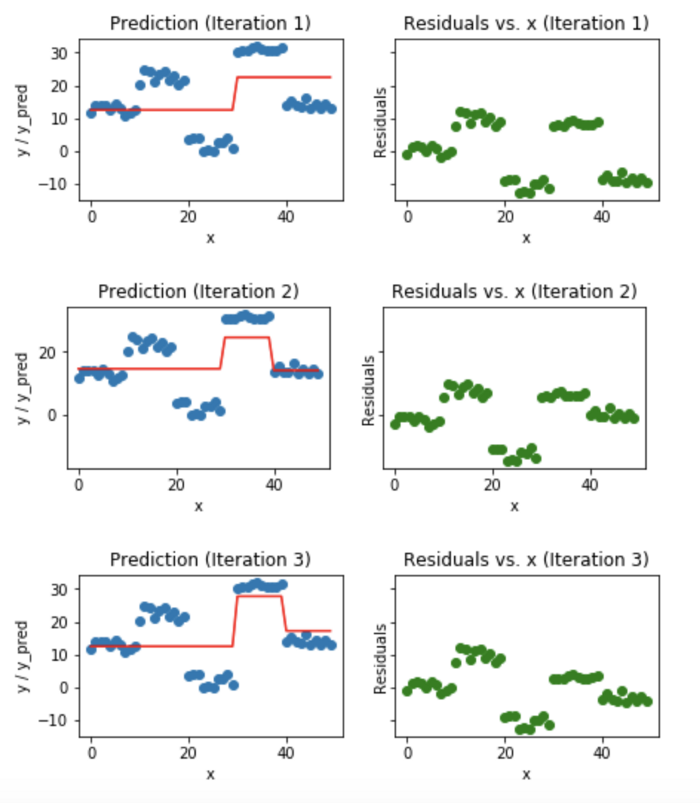

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
# 데이터 가져오기
X_train, X_test, y_train, y_test = get_human_dataset()


gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
print("accuracy: ", accuracy_score(y_test, gb_clf.predict(X_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy:  0.9385816084153377


GBM 과적합 방지:   
1. subsampling - 모집단에서 일부 샘플링한 데이터로 모델 학습, 확률적 그레디언트 부스팅이 된다   
(subsample = 0.5, 샘플의 반만 보여준다, subsmaple = 1.0, 샘플을 다 보여준다.)

2. Early Sttopping - 검증오차값을 기반으로(검증 오차가 향상되지 않으면) 조기종료한다.   
(n_iter_no_change = 5, 5번의 반복동안 검증오차가 향상되지 않으면 조기종료)

3. Shrinkage - learning_rate 조절을 통해 모델 정규화


GBM은 모델이 학습하는데 시간이 오래 걸리기 때문에 weak tree의 개수인 n_estimators와 learning_rate의 상호 고려가 필요하다

In [ ]:
# GBM 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators':[100,500],
    'learning_rate': [0.05,0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid = params, cv = 2, verbose =3)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: ', grid_cv.best_score_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/2] END learning_rate=0.05, n_estimators=100;, score=0.887 total time= 6.9min


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/2] END learning_rate=0.05, n_estimators=100;, score=0.913 total time= 7.0min


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/2] END learning_rate=0.05, n_estimators=500;, score=0.890 total time=31.3min


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/2] END learning_rate=0.05, n_estimators=500;, score=0.910 total time=30.9min


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/2] END learning_rate=0.1, n_estimators=100;, score=0.887 total time= 6.5min


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/2] END learning_rate=0.1, n_estimators=100;, score=0.911 total time= 6.5min


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/2] END learning_rate=0.1, n_estimators=500;, score=0.890 total time=21.3min


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/2] END learning_rate=0.1, n_estimators=500;, score=0.910 total time=25.1min


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: ignored

In [ ]:
### sklearn warm_start:
### warm_start가 true면 모델.fit()에 대해서 원래 있던 모델의 값을 사용해서 학습한다.

### skelarn partial_fit():
### partial_fit()은 원래 있던 모델에 대해서 한번 피팅한다.

### https://stackoverflow.com/questions/38052342/what-is-the-difference-between-partial-fit-and-warm-start

GBM 파생모델:   
1. XGBoost(eXtra Gradient Boost)   
트리기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘   
분산환경에서도 실행할 수 있어서 GBM의 단점인 느린 수행시간 및 과적합 규제 부재의 문제 해결 대부분의 분류와 회귀 분야에서 뛰어난 성능을 보여준다   
Level-wise로 트리를 만들어간다

2. LightGBM   
XGBoost보다 빠른 학습시간과 적은 메모리 사용량을 가지고 있는 알고리즘   
GridSearchCV를 사용한 파라미터 튜닝에서 빠른 학습시간으로 시간 단축   일반적으로 10,000 건 이하의 데이터 세트를 다루는 경우 과적합 문제가 발생할 수 있음   
Leaf-wise로 트리를 만들ㅇ간다

3. CatBoost   
모든 훈련 데이터를 대상으로 잔차 계산을 하는 것이 아니라 일부만 가지고 잔차 계산을 한 뒤 이걸로 모델을 만들고 남은 데이터의 잔차는 이 모델로 예측한 값을 사용한다.   
데이터의 대부분이 범주형 변수인 경우 사용하면 좋다.

스태킹 앙상블:   
개별 알고리즘이 예측한 결과를 최종 메타 데이터 세트로 만들어 별도의 ML 알고리즘으로 최종 학습을 수행하고 테스트 데이터를 기반으로 최종 예측을 수행하는 방식   
기반 모델 - 1차 예측을 수행하는 개별 알고리즘   
메타 모델 - 기반 모델의 예측 결과를 최종 데이터 세트로 학습하는 별도의 ML 알고리즘   

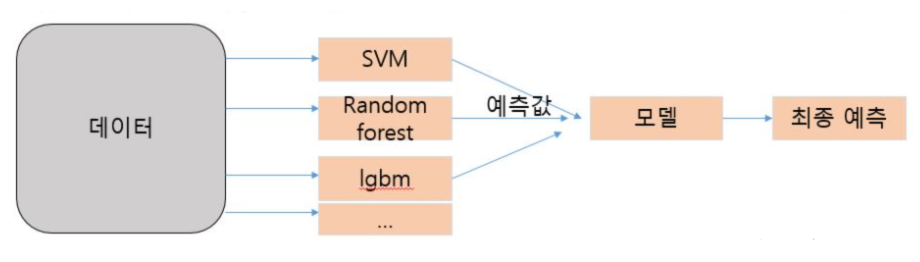


In [5]:
# 기본 스태킹 모델

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size = 0.2, random_state = 0)

estimators = [
              ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors = 4)),
              ('RandomForestClassifier', RandomForestClassifier(n_estimators = 100, random_state = 0)),
              ('DecisionTreeClassifier', DecisionTreeClassifier()),
              ('AdaBoostClassifier', AdaBoostClassifier(n_estimators = 100))
] # 기반모델

clf = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression(C = 10), cv = 5) # 메타 모델

clf.fit(X_train, y_train).score(X_test, y_test)

0.956140350877193